 <b>Software Engineer Migration Index </b>
 A composite indicator for evaluating countries for software engineers
 
Datasets 

- Indeed Software Engineer Job Dataset 
https://www.kaggle.com/datasets/samrat77/indeed-software-engineer-job-dataset 

- Healthy Lifestyle Cities Report 2021 
https://www.kaggle.com/datasets/prasertk/healthy-lifestyle-cities-report-2021 

- LinkedIn Software Engineering Jobs Dataset 
https://www.kaggle.com/datasets/asaniczka/software-engineer-job-postings-linkedin 

- Quality of Life for Each Country 
https://www.kaggle.com/datasets/ahmedmohamed2003/quality-of-life-for-each-country 

- Quality of Life Index by Country 
https://www.kaggle.com/datasets/marcelobatalhah/quality-of-life-index-by-country 
 

Articles 

https://www.linkedin.com/pulse/top-10-best-countries-software-engineers-2023-dannielle-seddon 
1. USA 
2. Canada 
3. Switzerland 

https://www.wearedevelopers.com/en/magazine/267/best-countries-for-software-engineers 
1. Canada 
2. Australia 
3. Sweden 

https://en.dev.bg/what-are-the-best-countries-for-software-engineers/ 
1. Canada 
2. Switzerland 
3. USA 

https://www.hackerearth.com/blog/developers/best-countries-software-engineers-developers-work-2017/ 
1. Switzerland 
2. Canada 
3. Australia 

https://www.geeksforgeeks.org/best-countries-for-software-engineers/ 
1. Switzerland 
2. USA 
3. UK 

https://medium.com/@analyticsinsight/best-countries-for-programming-jobs-4d264f37e001 
1. Switzerland 
2. USA 
3. UK 

https://rolespilot.com/blog/best-countries-for-software-engineers/ 
1. USA 
2. Switzerland 
3. Canada 

Asking CHATGPT 
https://chatgpt.com/c/67c8ab10-c968-8000-bd6b-928edde583c2 
1. Germany 
2. Canada 
3. USA 

Initial prediction  

1. Switzerland 
2. Canada 
3. USA 
 

In [4748]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt





<b>1.Theoretical Framework </b>

Software Engineer Migration Index

This index will help software engineers find the most attractive countries to work in. As there is a ever growing demand for developers globally This index will provide data driven insight to help software engineers make a informed decision with a consideration of both professional growth and opertunity as well as  a high quality of life.

Motivation:
The index was create to adress three critical requirements
1. Carrer development - Identify countries that are offering high wages and job potential for software developers
2. Qaulity of life - A high standard on the quality of daily life
3. Personal Relevence - As a soon to be software engineering graduate this analysis will help me choose my own choice for migration post graduation.

Index Composition
Sub- Indices
1. Economic Potential (Salary + Purchasing power) - 40%
2. Living Standards (Quality of Life + Cost_of_Living_Value) - 35%
3. Enviornmental Quality (Pollution Value) - 25% 

By looking at these factors the Software engineering migration index will be able to compare countries as potential destinations fot software engineers.

<b>2.Data Selection</b> 

In [4749]:
file_path = 'globalJobs.csv'
jobsData = pd.read_csv(file_path)
print(jobsData.head())

       Country             Job Title                Category  Salary Currency  \
0  Afghanistan      Account Examiner  Accounting and Finance  501400      AFN   
1  Afghanistan     Account Executive  Accounting and Finance  890100      AFN   
2  Afghanistan            Accountant  Accounting and Finance  705500      AFN   
3  Afghanistan    Accounting Analyst  Accounting and Finance  810500      AFN   
4  Afghanistan  Accounting Assistant  Accounting and Finance  552400      AFN   

   Exchange Rate  Salary (USD)  
0      71.244429       7037.74  
1      71.244429      12493.61  
2      71.244429       9902.53  
3      71.244429      11376.33  
4      71.244429       7753.59  


In [4750]:
file_path = 'Quality_of_Life.csv'
countryData = pd.read_csv(file_path)
print(countryData.head())

         country  Purchasing Power Value Purchasing Power Category  \
0    Afghanistan                   32.15                'Very Low'   
1  Aland Islands                  125.01               'Very High'   
2        Albania                   42.82                     'Low'   
3       Alderney                    0.00                       NaN   
4        Algeria                   27.60                'Very Low'   

   Safety Value Safety Category  Health Care Value Health Care Category  \
0         25.33           'Low'              24.24                'Low'   
1         71.81          'High'              79.72               'High'   
2         55.52      'Moderate'              48.21           'Moderate'   
3         83.79     'Very High'             100.00          'Very High'   
4         47.54      'Moderate'              54.43           'Moderate'   

   Climate Value Climate Category  Cost of Living Value  \
0           0.00              NaN                 21.08   
1         

<b>3.Imputation of missing data  </b>

In [4751]:
print(jobsData.isnull().sum()) 

print(jobsData.describe())

Country          0
Job Title        0
Category         0
Salary           0
Currency         0
Exchange Rate    0
Salary (USD)     0
dtype: int64
             Salary  Exchange Rate  Salary (USD)
count  8.371250e+05  837125.000000  8.371250e+05
mean   8.454217e+06    1531.410036  4.092947e+04
std    4.866869e+07    7490.026552  2.645599e+05
min    2.020000e+03       0.307772  2.895000e+01
25%    3.964000e+04       1.000000  6.255010e+03
50%    1.432000e+05      10.803173  1.470430e+04
75%    1.621400e+06     177.942203  3.256619e+04
max    2.604000e+09   90879.938461  1.617476e+07


In [4752]:
jobsData = jobsData[jobsData["Category"] == "Information Technology"]
print(jobsData["Category"].unique())

['Information Technology']


<h6>This will remove all the jobs that are not part of the Information Technology Category</h6>

In [4753]:
# jobsData = jobsData[~jobsData["Job Title"].str.contains("Manager", case=False, na=False)]
# jobsData = jobsData[~jobsData["Job Title"].str.contains("Director", case=False, na=False)]
# jobsData = jobsData[~jobsData["Job Title"].str.contains("Executive", case=False, na=False)]
# jobsData = jobsData[~jobsData["Job Title"].str.contains("Chief Information Officer", case=False, na=False)]
# jobsData = jobsData[~jobsData["Job Title"].str.contains("Supervisor", case=False, na=False)]
# jobsData = jobsData[~jobsData["Job Title"].str.contains("Head of", case=False, na=False)]
# jobsData = jobsData[~jobsData["Job Title"].str.contains("Administrator", case=False, na=False)]
# jobsData = jobsData[~jobsData["Job Title"].str.contains("Infrastructure", case=False, na=False)]
# jobsData = jobsData[~jobsData["Job Title"].str.contains("Coordinator", case=False, na=False)]
# jobsData = jobsData[~jobsData["Job Title"].str.contains("Leader", case=False, na=False)]
# jobsData = jobsData[~jobsData["Job Title"].str.contains("Trainer", case=False, na=False)]
# jobsData = jobsData[~jobsData["Job Title"].str.contains("Administration", case=False, na=False)]
# jobsData = jobsData[~jobsData["Job Title"].str.contains("Lead", case=False, na=False)]
# jobsData = jobsData[~jobsData["Job Title"].str.contains("Associate", case=False, na=False)]
# jobsData = jobsData[~jobsData["Job Title"].str.contains("Architect", case=False, na=False)]
# jobsData = jobsData[~jobsData["Job Title"].str.contains("President", case=False, na=False)]
# jobsData = jobsData[~jobsData["Job Title"].str.contains("Expert", case=False, na=False)]
# jobsData = jobsData[~jobsData["Job Title"].str.contains("Consultant", case=False, na=False)]
# jobsData = jobsData[~jobsData["Job Title"].str.contains("Chief Information Security Officer", case=False, na=False)]
# jobsData = jobsData[~jobsData["Job Title"].str.contains("Specialist", case=False, na=False)]
# jobsData = jobsData[~jobsData["Job Title"].str.contains("Researcher", case=False, na=False)]
# jobsData = jobsData[~jobsData["Job Title"].str.contains("Analyst", case=False, na=False)]

total_rows = jobsData.shape[0]
print(f"Total number of rows: {total_rows}")

Total number of rows: 67184


<h6>Check number of rows before and after your remove a job that is not suitable for a Junior Dev</h6>

In [4754]:
jobsData_Clean = jobsData.drop(columns=["Salary","Currency","Exchange Rate","Category"])
jobsData_Clean.rename(columns={'Salary (USD)': 'Salary'}, inplace=True)
jobsData_Clean.rename(columns={'Job Title': 'Job_Title'}, inplace=True)

print(jobsData_Clean.head())

          Country                    Job_Title    Salary
2293  Afghanistan    2nd Line Systems Engineer  12893.64
2294  Afghanistan               ABAP Developer  11636.00
2295  Afghanistan  Advertising Account Planner  12139.90
2296  Afghanistan            Android Developer  13623.52
2297  Afghanistan            Angular Developer  12422.02


In [4755]:
# As of 24/04/2025 the exchange rate is 1 Sao Tome and Principe = 0.046 USD
cuban_conversion_rate = 0.046 
jobsData_Clean.loc[jobsData_Clean['Country'] == 'Sao Tome and Principe', 'Salary'] = jobsData_Clean.loc[jobsData_Clean['Country'] == 'Sao Tome and Principe', 'Salary'] * cuban_conversion_rate

In [4756]:
# As of 24/04/2025 the exchange rate is 1 Cuban Peso = 0.042 USD
cuban_conversion_rate = 0.042 
jobsData_Clean.loc[jobsData_Clean['Country'] == 'Cuba', 'Salary'] = jobsData_Clean.loc[jobsData_Clean['Country'] == 'Cuba', 'Salary'] * cuban_conversion_rate

In [4757]:
median_salaries = jobsData_Clean.groupby('Country')['Salary'].median().reset_index()
print (median_salaries.head())
median_salaries.rename(columns={'Salary': 'Median_Salary'}, inplace=True)  

          Country     Salary
0     Afghanistan  13274.020
1         Albania  12127.235
2         Algeria  16211.800
3  American Samoa  19210.000
4         Andorra  50209.275


In [4758]:
print(countryData.isnull().sum()) 

country                                0
Purchasing Power Value                 0
Purchasing Power Category             46
Safety Value                           0
Safety Category                        2
Health Care Value                      0
Health Care Category                  15
Climate Value                          0
Climate Category                     122
Cost of Living Value                   0
Cost of Living Category               45
Property Price to Income Value         0
Property Price to Income Category     21
Traffic Commute Time Value             0
Traffic Commute Time Category         29
Pollution Value                        0
Pollution Category                    10
Quality of Life Value                  0
Quality of Life Category             122
dtype: int64


In [4759]:
countryData.fillna("Very Low", inplace=True)

In [4760]:
countryData["Quality of Life Value"] = countryData["Quality of Life Value"].astype(str).str.replace(":", "", regex=False)

In [4761]:
countryData["Quality of Life Value"] = (countryData["Quality of Life Value"].astype(str).str.replace(":", "", regex=False).str.replace("'", "", regex=False).str.strip())

In [4762]:
countryData["Property Price to Income Value"] = pd.to_numeric(countryData["Property Price to Income Value"], errors='coerce').round(2)

In [4763]:
kazakhstan_climate_value = countryData.loc[countryData['country'] == 'Kazakhstan', 'Climate Value'].values[0]
countryData.loc[countryData['country'] == 'Mongolia', 'Climate Value'] = kazakhstan_climate_value

In [4764]:
countryData['Purchasing Power Category'] = countryData['Purchasing Power Category'].str.replace("'", "").str.strip()
valid_purchasing_power_values = countryData[(countryData['Purchasing Power Value'].notna()) & (countryData['Purchasing Power Value'] != 0.0) & (countryData['Purchasing Power Category'] == 'Very Low')]

average_very_low = valid_purchasing_power_values['Purchasing Power Value'].mean()
average_very_low = round(average_very_low, 2)

countryData.loc[(countryData['Purchasing Power Category'] == 'Very Low') & (countryData['Purchasing Power Value'] == 0.0), 'Purchasing Power Value'] = average_very_low

In [4765]:
countryData['Purchasing Power Category'] = countryData['Purchasing Power Category'].str.replace("'", "").str.strip()
valid_purchasing_power_values = countryData[(countryData['Purchasing Power Value'].notna()) & (countryData['Purchasing Power Value'] != 0.0) & (countryData['Purchasing Power Category'] == 'Very Low')]

average_very_low = valid_purchasing_power_values['Purchasing Power Value'].mean()
average_very_low = round(average_very_low, 2)

countryData.loc[(countryData['Purchasing Power Category'] == 'Very Low') & (countryData['Purchasing Power Value'] == 0.0), 'Purchasing Power Value'] = average_very_low

In [4766]:
countryData['Safety Category'] = countryData['Safety Category'].str.replace("'", "").str.strip()
valid_safety_values = countryData[(countryData['Safety Value'].notna()) & (countryData['Safety Value'] != 0.0) & (countryData['Safety Category'] == 'Very Low')]

average_very_low_safety = valid_safety_values['Safety Value'].mean()
average_very_low_safety = round(average_very_low_safety, 2) 

countryData.loc[(countryData['Safety Category'] == 'Very Low') & (countryData['Safety Value'] == 0.0), 'Safety Value'] = average_very_low_safety

In [4767]:
median_climate = countryData[countryData['Climate Value'] != 0.0]['Climate Value'].median()
replacement_value = round(median_climate, 2) if not pd.isna(median_climate) else 25
countryData.loc[(countryData['Climate Category'] == 'Very Low') & (countryData['Climate Value'] == 0.0), 'Climate Value'] = replacement_value

In [4768]:
countryData['Quality of Life Category'] = countryData['Quality of Life Category'].str.replace("'", "").str.strip()
countryData['Quality of Life Value'] = pd.to_numeric(countryData['Quality of Life Value'], errors='coerce')

valid_quality_of_life_values = countryData[(countryData['Quality of Life Value'].notna()) & (countryData['Quality of Life Value'] != 0.0) & (countryData['Quality of Life Category'] == 'Very Low')]

average_very_low_quality_of_life = valid_quality_of_life_values['Quality of Life Value'].mean()
average_very_low_quality_of_life = round(average_very_low_quality_of_life, 2)

countryData.loc[(countryData['Quality of Life Category'] == 'Very Low') & (countryData['Quality of Life Value'] == 0.0), 'Quality of Life Value'] = average_very_low_quality_of_life

In [4769]:
countryData['Pollution Category'] = countryData['Pollution Category'].str.replace("'", "").str.strip()
valid_pollution_values = countryData[(countryData['Pollution Value'].notna()) & (countryData['Pollution Value'] != 0.0) & (countryData['Pollution Category'] == 'Very Low')]

average_very_low_pollution = valid_pollution_values['Pollution Value'].mean()
average_very_low_pollution = round(average_very_low_pollution, 2)

countryData.loc[(countryData['Pollution Category'] == 'Very Low') & (countryData['Pollution Value'] == 0.0), 'Pollution Value'] = average_very_low_pollution

In [4770]:
countryData['Traffic Commute Time Category'] = countryData['Traffic Commute Time Category'].str.replace("'", "").str.strip()

valid_traffic_commute_time_values = countryData[(countryData['Traffic Commute Time Value'].notna()) & (countryData['Traffic Commute Time Value'] != 0.0) & (countryData['Traffic Commute Time Category'] == 'Very Low')]


average_very_low_traffic_commute_time = valid_traffic_commute_time_values['Traffic Commute Time Value'].mean()
average_very_low_traffic_commute_time = round(average_very_low_traffic_commute_time, 2)

countryData.loc[(countryData['Traffic Commute Time Category'] == 'Very Low') & (countryData['Traffic Commute Time Value'] == 0.0), 'Traffic Commute Time Value'] = average_very_low_traffic_commute_time

In [4771]:
countryData['Cost of Living Category'] = countryData['Cost of Living Category'].str.replace("'", "").str.strip()

valid_cost_of_living_values = countryData[(countryData['Cost of Living Value'].notna()) & (countryData['Cost of Living Value'] != 0.0) & (countryData['Cost of Living Category'] == 'Very Low')]

average_very_low_cost_of_living = valid_cost_of_living_values['Cost of Living Value'].mean()
average_very_low_cost_of_living = round(average_very_low_cost_of_living, 2)

countryData.loc[(countryData['Cost of Living Category'] == 'Very Low') & (countryData['Cost of Living Value'] == 0.0), 'Cost of Living Value'] = average_very_low_cost_of_living

In [4772]:
countryData['Cost of Living Category'] = countryData['Cost of Living Category'].str.replace("'", "").str.strip()

valid_cost_of_living_values = countryData[(countryData['Cost of Living Value'].notna()) & (countryData['Cost of Living Value'] != 0.0) & (countryData['Cost of Living Category'] == 'Very Low')]

average_very_low_cost_of_living = valid_cost_of_living_values['Cost of Living Value'].mean()
average_very_low_cost_of_living = round(average_very_low_cost_of_living, 2)

countryData.loc[(countryData['Cost of Living Category'] == 'Very Low') & (countryData['Cost of Living Value'] == 0.0), 'Cost of Living Value'] = average_very_low_cost_of_living

In [4773]:
countryData['Property Price to Income Category'] = countryData['Property Price to Income Category'].str.replace("'", "").str.strip()

countryData['Property Price to Income Value'] = (countryData['Property Price to Income Value'].astype(str).str.replace("'", "").str.replace(",", "").astype(float) )

valid_high_values = countryData[(countryData['Property Price to Income Value'].notna()) & (countryData['Property Price to Income Value'] != 0.0) & (countryData['Property Price to Income Category'] == 'Very High')]

average_very_high_property_price_to_income = valid_high_values['Property Price to Income Value'].mean()
average_very_high_property_price_to_income = round(average_very_high_property_price_to_income, 2)

countryData.loc[(countryData['Property Price to Income Value'].isna()) | (countryData['Property Price to Income Value'] == 0.0), 'Property Price to Income Value'] = average_very_high_property_price_to_income

In [4774]:
countryData['Health Care Category'] = countryData['Health Care Category'].str.replace("'", "").str.strip()
countryData['Health Care Value'] = pd.to_numeric(countryData['Health Care Value'], errors='coerce')
valid_health_care_values = countryData[(countryData['Health Care Value'].notna()) & (countryData['Health Care Value'] != 0.0) & 
(countryData['Health Care Category'] == 'Very Low')]

average_very_low_health_care = valid_health_care_values['Health Care Value'].mean()
average_very_low_health_care = round(average_very_low_health_care, 2)

countryData.loc[(countryData['Health Care Category'] == 'Very Low') & (countryData['Health Care Value'] == 0.0), 'Health Care Value'] = average_very_low_health_care

In [4775]:
countryData.to_csv("UpdatedDataset.csv", index=False)
print("Updated dataset saved as 'UpdatedDataset.csv'")

Updated dataset saved as 'UpdatedDataset.csv'


In [4776]:
print(countryData.isnull().sum())
print(countryData.info())
CountryData_Clean = countryData.copy()

country                              0
Purchasing Power Value               0
Purchasing Power Category            0
Safety Value                         0
Safety Category                      0
Health Care Value                    0
Health Care Category                 0
Climate Value                        0
Climate Category                     0
Cost of Living Value                 0
Cost of Living Category              0
Property Price to Income Value       0
Property Price to Income Category    0
Traffic Commute Time Value           0
Traffic Commute Time Category        0
Pollution Value                      0
Pollution Category                   0
Quality of Life Value                0
Quality of Life Category             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   country 

In [4777]:

print(CountryData_Clean['Purchasing Power Category'].unique())

['Very Low' 'Very High' 'Low' 'Moderate' 'High']


In [4778]:

purchasing_power_map = {"'Very Low'": 0,"'Low'": 1,"'Moderate'": 2,"'High'":3 ,"'Very High'": 4}
CountryData_Clean['Purchasing Power Category'] = CountryData_Clean['Purchasing Power Category'].replace(purchasing_power_map)
print(CountryData_Clean['Purchasing Power Category'].unique())

['Very Low' 'Very High' 'Low' 'Moderate' 'High']


In [4779]:
safery_category_map = {"'Very Low'": 0,"'Low'": 1,"'Moderate'": 2,"'High'":3 ,"'Very High'": 4}
CountryData_Clean['Safety Category'] = CountryData_Clean['Safety Category'].replace(safery_category_map)
print(CountryData_Clean['Safety Category'].unique())

['Low' 'High' 'Moderate' 'Very High' 'Very Low']


In [4780]:
health_care_category_map = {"'Very Low'": 0,"'Low'": 1,"'Moderate'": 2,"'High'":3 ,"'Very High'": 4}
CountryData_Clean['Health Care Category'] = CountryData_Clean['Health Care Category'].replace(health_care_category_map)
print(CountryData_Clean['Health Care Category'].unique())

['Low' 'High' 'Moderate' 'Very High' 'Very Low']


In [4781]:
climate_category_map = {"'Very Low'": 0,"'Low'": 1,"'Moderate'": 2,"'High'":3 ,"'Very High'": 4}
CountryData_Clean['Climate Category'] = CountryData_Clean['Climate Category'].replace(climate_category_map)
print(CountryData_Clean['Climate Category'].unique())

['Very Low' 4 3 2 1]


In [4782]:
cost_of_living_category_map = {"'Very Low'": 0,"'Low'": 1,"'Moderate'": 2,"'High'":3 ,"'Very High'": 4}
CountryData_Clean['Cost of Living Category'] = CountryData_Clean['Cost of Living Category'].replace(cost_of_living_category_map)
print(CountryData_Clean['Cost of Living Category'].unique())

['Very Low' 'Low' 'High' 'Moderate' 'Very High']


In [4783]:
# property_price_to_income_category_map = {"'Very Low'": 0,"'Low'": 1,"'Moderate'": 2,"'High'":3 ,"'Very High'": 4}
# CountryData_Clean['Property Price to Income Category'] = CountryData_Clean['Property Price to Income Category'].replace(property_price_to_income_category_map)
# print(CountryData_Clean['Property Price to Income Category'].unique())

In [4784]:
traffic_commute_time_category_map = {"'Very Low'": 0,"'Low'": 1,"'Moderate'": 2,"'High'":3 ,"'Very High'": 4}
CountryData_Clean['Traffic Commute Time Category'] = CountryData_Clean['Traffic Commute Time Category'].replace(traffic_commute_time_category_map)
print(CountryData_Clean['Traffic Commute Time Category'].unique())

['Very High' 'Very Low' 'Moderate' 'High' 'Low']


In [4785]:
traffic_commute_time_category_map = {"'Very Low'": 0,"'Low'": 1,"'Moderate'": 2,"'High'":3 ,"'Very High'": 4}
CountryData_Clean['Traffic Commute Time Category'] = CountryData_Clean['Traffic Commute Time Category'].replace(traffic_commute_time_category_map)
print(CountryData_Clean['Traffic Commute Time Category'].unique())

['Very High' 'Very Low' 'Moderate' 'High' 'Low']


In [4786]:

pollution_category_map = {"'Very Low'": 0,"'Low'": 1,"'Moderate'": 2,"'High'":3 ,"'Very High'": 4}
CountryData_Clean['Pollution Category'] = CountryData_Clean['Pollution Category'].replace(pollution_category_map)
print(CountryData_Clean['Pollution Category'].unique())

['Very High' 'Very Low' 'High' 'Low' 'Moderate']


In [4787]:
# quality_of_life_category_map = {"'Very Low'": 0,"'Low'": 1,"'Moderate'": 2,"'High'":3 ,"'Very High'": 4}
# CountryData_Clean['Quality of Life Category'] = CountryData_Clean['Quality of Life Category'].replace(quality_of_life_category_map)
# print(CountryData_Clean['Quality of Life Category'].unique())

In [4788]:
CountryData_Clean.rename(columns={'country': 'Country'}, inplace=True)  
CountryData_Clean.rename(columns={'Purchasing Power Value': 'Purchasing_Power_Value'}, inplace=True)  
CountryData_Clean.rename(columns={'Purchasing Power Category': 'Purchasing_Power_Category'}, inplace=True)  
CountryData_Clean.rename(columns={'Safety Value': 'Safety_Value'}, inplace=True)  
CountryData_Clean.rename(columns={'Safety Category': 'Safety_Category'}, inplace=True)  
CountryData_Clean.rename(columns={'Health Care Value': 'Health_Care_Value'}, inplace=True)  
CountryData_Clean.rename(columns={'Health Care Category': 'Health_Care_Category'}, inplace=True)  
CountryData_Clean.rename(columns={'Climate Value': 'Climate_Value'}, inplace=True)  
CountryData_Clean.rename(columns={'Climate Category': 'Climate_Category'}, inplace=True)  
CountryData_Clean.rename(columns={'Cost of Living Value': 'Cost_of_Living_Value'}, inplace=True)  
CountryData_Clean.rename(columns={'Cost of Living Category': 'Cost_of_Living_Category'}, inplace=True)  
CountryData_Clean.rename(columns={'Property Price to Income Value': 'Property_Price_to_Income_Value'}, inplace=True)  
CountryData_Clean.rename(columns={'Property Price to Income Category': 'Property_Price_to_Income_Category'}, inplace=True)  
CountryData_Clean.rename(columns={'Traffic Commute Time Value': 'Traffic_Commute_Time_Value'}, inplace=True)  
CountryData_Clean.rename(columns={'Traffic Commute Time Category': 'Traffic_Commute_Time_Category'}, inplace=True)  
CountryData_Clean.rename(columns={'Pollution Value': 'Pollution_Value'}, inplace=True)  
CountryData_Clean.rename(columns={'Pollution Category': 'Pollution_Category'}, inplace=True)  
CountryData_Clean.rename(columns={'Quality of Life Value': 'Quality_of_Life_Value'}, inplace=True)  
CountryData_Clean.rename(columns={'Quality of Life Category': 'Quality_of_Life_Category'}, inplace=True)  

print(CountryData_Clean.head())

         Country  Purchasing_Power_Value Purchasing_Power_Category  \
0    Afghanistan                   32.15                  Very Low   
1  Aland Islands                  125.01                 Very High   
2        Albania                   42.82                       Low   
3       Alderney                   24.32                  Very Low   
4        Algeria                   27.60                  Very Low   

   Safety_Value Safety_Category  Health_Care_Value Health_Care_Category  \
0         25.33             Low              24.24                  Low   
1         71.81            High              79.72                 High   
2         55.52        Moderate              48.21             Moderate   
3         83.79       Very High             100.00            Very High   
4         47.54        Moderate              54.43             Moderate   

   Climate_Value Climate_Category  Cost_of_Living_Value  \
0          80.60         Very Low                 21.08   
1         

<b>4.Multivariate Analysis </b>

Job Data Scatterplots

Country Data Scatterplots

First value is the correlation (Moderate) in this case. Second value is the p-value. That is probability that this is a random occurrence.

If the p-value is below 0.05 we say that it is statistically significant.

Bivariate Analysis

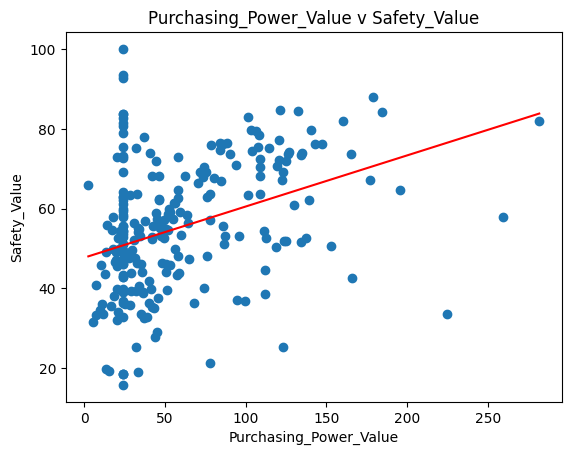

In [4789]:
plt.title("Purchasing_Power_Value v Safety_Value")
plt.xlabel("Purchasing_Power_Value")
plt.ylabel("Safety_Value")
plt.scatter(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Safety_Value)
plt.plot(np.unique(CountryData_Clean.Purchasing_Power_Value), np.poly1d(np.polyfit(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Safety_Value, 1))(np.unique(CountryData_Clean.Purchasing_Power_Value)), color='red')

In [4790]:
corr = pearsonr(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Safety_Value)
print(corr)

PearsonRResult(statistic=np.float64(0.3699820103488908), pvalue=np.float64(4.546755709317698e-09))


In [4791]:
data = sm.add_constant(CountryData_Clean['Purchasing_Power_Value'])
model = sm.OLS(CountryData_Clean['Safety_Value'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:           Safety_Value   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     37.11
Date:                Fri, 02 May 2025   Prob (F-statistic):           4.55e-09
Time:                        18:14:32   Log-Likelihood:                -978.28
No. Observations:                 236   AIC:                             1961.
Df Residuals:                     234   BIC:                             1967.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     47

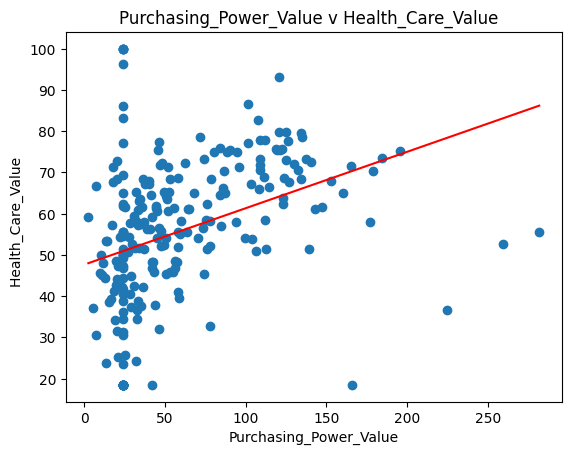

In [4792]:
plt.title("Purchasing_Power_Value v Health_Care_Value  ")
plt.xlabel("Purchasing_Power_Value")
plt.ylabel("Health_Care_Value  ")
plt.scatter(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Health_Care_Value  )
plt.plot(np.unique(CountryData_Clean.Purchasing_Power_Value), np.poly1d(np.polyfit(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Health_Care_Value  , 1))(np.unique(CountryData_Clean.Purchasing_Power_Value)), color='red')

In [4793]:
corr = pearsonr(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Health_Care_Value  )
print(corr)

PearsonRResult(statistic=np.float64(0.36668447797061265), pvalue=np.float64(6.370623583569795e-09))


In [4794]:
data = sm.add_constant(CountryData_Clean['Purchasing_Power_Value'])
model = sm.OLS(CountryData_Clean['Health_Care_Value'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:      Health_Care_Value   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     36.35
Date:                Fri, 02 May 2025   Prob (F-statistic):           6.37e-09
Time:                        18:14:32   Log-Likelihood:                -996.42
No. Observations:                 236   AIC:                             1997.
Df Residuals:                     234   BIC:                             2004.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     47

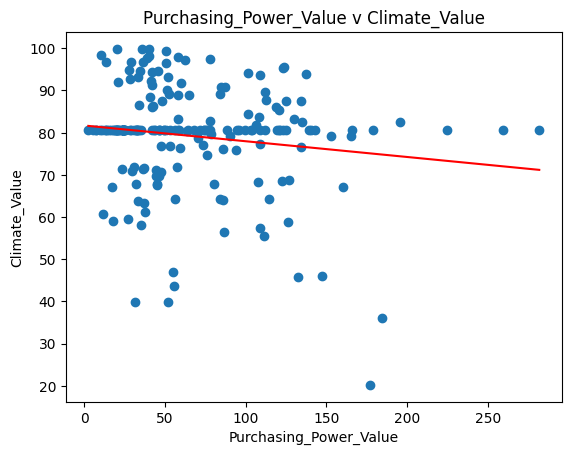

In [4795]:
plt.title("Purchasing_Power_Value v Climate_Value")
plt.xlabel("Purchasing_Power_Value")
plt.ylabel("Climate_Value")
plt.scatter(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Climate_Value)
plt.plot(np.unique(CountryData_Clean.Purchasing_Power_Value), np.poly1d(np.polyfit(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Climate_Value  , 1))(np.unique(CountryData_Clean.Purchasing_Power_Value)), color='red')

In [4796]:
corr = pearsonr(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Climate_Value)
print(corr)

PearsonRResult(statistic=np.float64(-0.1565763388801493), pvalue=np.float64(0.016063590019659662))


In [4797]:
data = sm.add_constant(CountryData_Clean['Purchasing_Power_Value'])
model = sm.OLS(CountryData_Clean['Climate_Value'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:          Climate_Value   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     5.881
Date:                Fri, 02 May 2025   Prob (F-statistic):             0.0161
Time:                        18:14:32   Log-Likelihood:                -904.83
No. Observations:                 236   AIC:                             1814.
Df Residuals:                     234   BIC:                             1821.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     81

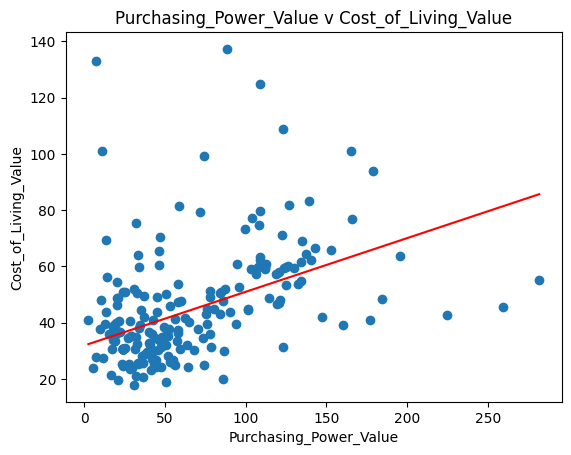

In [4798]:
plt.title("Purchasing_Power_Value v Cost_of_Living_Value")
plt.xlabel("Purchasing_Power_Value")
plt.ylabel("Cost_of_Living_Value")
plt.scatter(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Cost_of_Living_Value)
plt.plot(np.unique(CountryData_Clean.Purchasing_Power_Value), np.poly1d(np.polyfit(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Cost_of_Living_Value, 1))(np.unique(CountryData_Clean.Purchasing_Power_Value)), color='red')

In [4799]:
corr = pearsonr(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Cost_of_Living_Value  )
print(corr)

PearsonRResult(statistic=np.float64(0.46517887384585854), pvalue=np.float64(4.4918670504972035e-14))


In [4800]:
data = sm.add_constant(CountryData_Clean['Purchasing_Power_Value'])
model = sm.OLS(CountryData_Clean['Cost_of_Living_Value'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                             OLS Regression Results                             
Dep. Variable:     Cost_of_Living_Value   R-squared:                       0.216
Model:                              OLS   Adj. R-squared:                  0.213
Method:                   Least Squares   F-statistic:                     64.62
Date:                  Fri, 02 May 2025   Prob (F-statistic):           4.49e-14
Time:                          18:14:32   Log-Likelihood:                -1007.2
No. Observations:                   236   AIC:                             2018.
Df Residuals:                       234   BIC:                             2025.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const   

In [4801]:
# plt.title("Purchasing_Power_Value v Property_Price_to_Income_Category")
# plt.xlabel("Purchasing_Power_Value")
# plt.ylabel("Property_Price_to_Income_Category")
# plt.scatter(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Property_Price_to_Income_Category)
# plt.plot(np.unique(CountryData_Clean.Purchasing_Power_Value), np.poly1d(np.polyfit(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Property_Price_to_Income_Category, 1))(np.unique(CountryData_Clean.Purchasing_Power_Value)), color='red')

In [4802]:
# corr = pearsonr(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Property_Price_to_Income_Category  )
# print(corr)

In [4803]:
# data = sm.add_constant(CountryData_Clean['Purchasing_Power_Value'])
# model = sm.OLS(CountryData_Clean['Property_Price_to_Income_Category'], data)
# result = model.fit()
# print(result.summary())
# # Line below is for the standard error
# print(result.scale**0.5)

In [4804]:
data = sm.add_constant(CountryData_Clean['Purchasing_Power_Value'])
model = sm.OLS(CountryData_Clean['Cost_of_Living_Value'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                             OLS Regression Results                             
Dep. Variable:     Cost_of_Living_Value   R-squared:                       0.216
Model:                              OLS   Adj. R-squared:                  0.213
Method:                   Least Squares   F-statistic:                     64.62
Date:                  Fri, 02 May 2025   Prob (F-statistic):           4.49e-14
Time:                          18:14:32   Log-Likelihood:                -1007.2
No. Observations:                   236   AIC:                             2018.
Df Residuals:                       234   BIC:                             2025.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const   

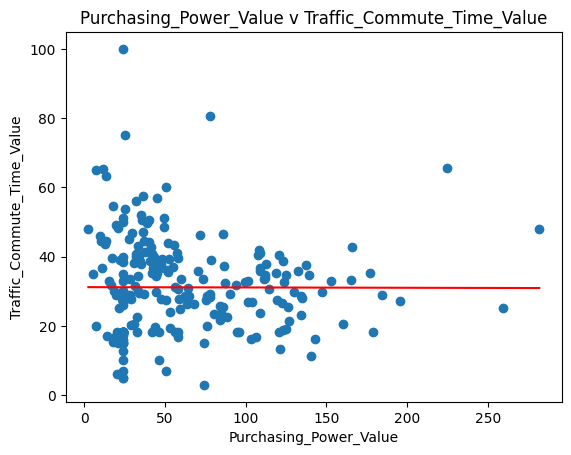

In [4805]:
plt.title("Purchasing_Power_Value v Traffic_Commute_Time_Value")
plt.xlabel("Purchasing_Power_Value")
plt.ylabel("Traffic_Commute_Time_Value")
plt.scatter(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Traffic_Commute_Time_Value)
plt.plot(np.unique(CountryData_Clean.Purchasing_Power_Value), np.poly1d(np.polyfit(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Traffic_Commute_Time_Value, 1))(np.unique(CountryData_Clean.Purchasing_Power_Value)), color='red')

In [4806]:
corr = pearsonr(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Traffic_Commute_Time_Value  )
print(corr)

PearsonRResult(statistic=np.float64(-0.003175405735252282), pvalue=np.float64(0.9612997359560279))


In [4807]:
data = sm.add_constant(CountryData_Clean['Purchasing_Power_Value'])
model = sm.OLS(CountryData_Clean['Traffic_Commute_Time_Value'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                                OLS Regression Results                                
Dep. Variable:     Traffic_Commute_Time_Value   R-squared:                       0.000
Model:                                    OLS   Adj. R-squared:                 -0.004
Method:                         Least Squares   F-statistic:                  0.002359
Date:                        Fri, 02 May 2025   Prob (F-statistic):              0.961
Time:                                18:14:32   Log-Likelihood:                -954.94
No. Observations:                         236   AIC:                             1914.
Df Residuals:                             234   BIC:                             1921.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

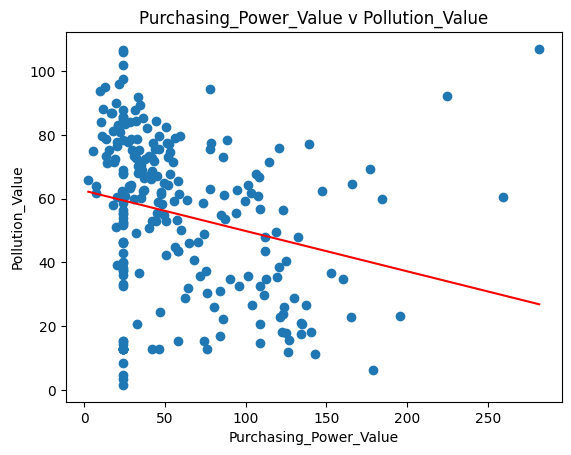

In [4808]:
plt.title("Purchasing_Power_Value v Pollution_Value")
plt.xlabel("Purchasing_Power_Value")
plt.ylabel("Pollution_Value")
plt.scatter(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Pollution_Value)
plt.plot(np.unique(CountryData_Clean.Purchasing_Power_Value), np.poly1d(np.polyfit(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Pollution_Value, 1))(np.unique(CountryData_Clean.Purchasing_Power_Value)), color='red')

In [4809]:
corr = pearsonr(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Pollution_Value  )
print(corr)

PearsonRResult(statistic=np.float64(-0.2432597504740991), pvalue=np.float64(0.00016062935172623274))


In [4810]:
data = sm.add_constant(CountryData_Clean['Purchasing_Power_Value'])
model = sm.OLS(CountryData_Clean['Pollution_Value'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:        Pollution_Value   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     14.72
Date:                Fri, 02 May 2025   Prob (F-statistic):           0.000161
Time:                        18:14:33   Log-Likelihood:                -1084.0
No. Observations:                 236   AIC:                             2172.
Df Residuals:                     234   BIC:                             2179.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     62

In [4811]:
# plt.title("Purchasing_Power_Value v Quality_of_Life_Category")
# plt.xlabel("Purchasing_Power_Value")
# plt.ylabel("Quality_of_Life_Category")
# plt.scatter(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Quality_of_Life_Category)
# plt.plot(np.unique(CountryData_Clean.Purchasing_Power_Value), np.poly1d(np.polyfit(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Quality_of_Life_Category, 1))(np.unique(CountryData_Clean.Purchasing_Power_Value)), color='red')

In [4812]:
corr = pearsonr(CountryData_Clean.Purchasing_Power_Value, CountryData_Clean.Pollution_Value  )
print(corr)

PearsonRResult(statistic=np.float64(-0.2432597504740991), pvalue=np.float64(0.00016062935172623274))


In [4813]:
data = sm.add_constant(CountryData_Clean['Purchasing_Power_Value'])
model = sm.OLS(CountryData_Clean['Pollution_Value'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:        Pollution_Value   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     14.72
Date:                Fri, 02 May 2025   Prob (F-statistic):           0.000161
Time:                        18:14:33   Log-Likelihood:                -1084.0
No. Observations:                 236   AIC:                             2172.
Df Residuals:                     234   BIC:                             2179.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     62

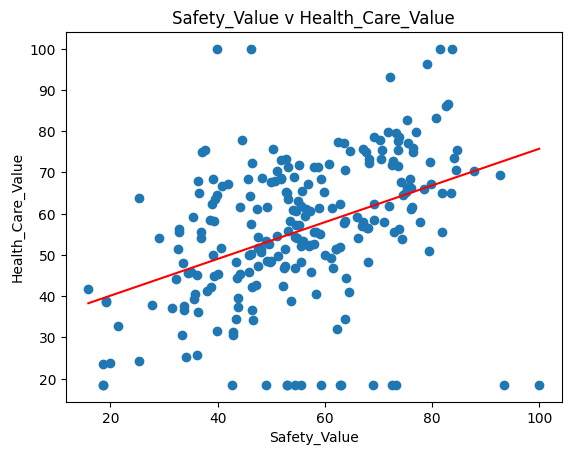

In [4814]:
plt.title("Safety_Value v Health_Care_Value")
plt.xlabel("Safety_Value")
plt.ylabel("Health_Care_Value")
plt.scatter(CountryData_Clean.Safety_Value, CountryData_Clean.Health_Care_Value)
plt.plot(np.unique(CountryData_Clean.Safety_Value), np.poly1d(np.polyfit(CountryData_Clean.Safety_Value, CountryData_Clean.Health_Care_Value, 1))(np.unique(CountryData_Clean.Safety_Value)), color='red')

In [4815]:
corr = pearsonr(CountryData_Clean.Safety_Value, CountryData_Clean.Health_Care_Value)
print(corr)

PearsonRResult(statistic=np.float64(0.4130056529636532), pvalue=np.float64(3.8849454358685355e-11))


In [4816]:
data = sm.add_constant(CountryData_Clean['Safety_Value'])
model = sm.OLS(CountryData_Clean['Health_Care_Value'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:      Health_Care_Value   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     48.12
Date:                Fri, 02 May 2025   Prob (F-statistic):           3.88e-11
Time:                        18:14:33   Log-Likelihood:                -991.39
No. Observations:                 236   AIC:                             1987.
Df Residuals:                     234   BIC:                             1994.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           31.2212      3.712      8.411   

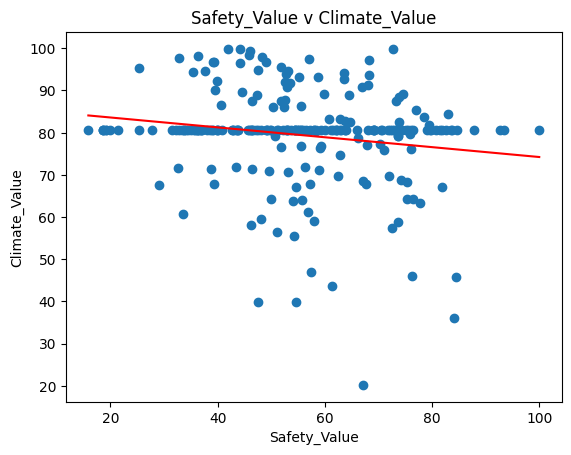

In [4817]:
plt.title("Safety_Value v Climate_Value")
plt.xlabel("Safety_Value")
plt.ylabel("Climate_Value")
plt.scatter(CountryData_Clean.Safety_Value, CountryData_Clean.Climate_Value)
plt.plot(np.unique(CountryData_Clean.Safety_Value), np.poly1d(np.polyfit(CountryData_Clean.Safety_Value, CountryData_Clean.Climate_Value, 1))(np.unique(CountryData_Clean.Safety_Value)), color='red')

In [4818]:
corr = pearsonr(CountryData_Clean.Safety_Value, CountryData_Clean.Climate_Value)
print(corr)

PearsonRResult(statistic=np.float64(-0.1700735622557915), pvalue=np.float64(0.008846046614254824))


In [4819]:
data = sm.add_constant(CountryData_Clean['Safety_Value'])
model = sm.OLS(CountryData_Clean['Climate_Value'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:          Climate_Value   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     6.970
Date:                Fri, 02 May 2025   Prob (F-statistic):            0.00885
Time:                        18:14:33   Log-Likelihood:                -904.30
No. Observations:                 236   AIC:                             1813.
Df Residuals:                     234   BIC:                             1820.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           85.9438      2.567     33.487   

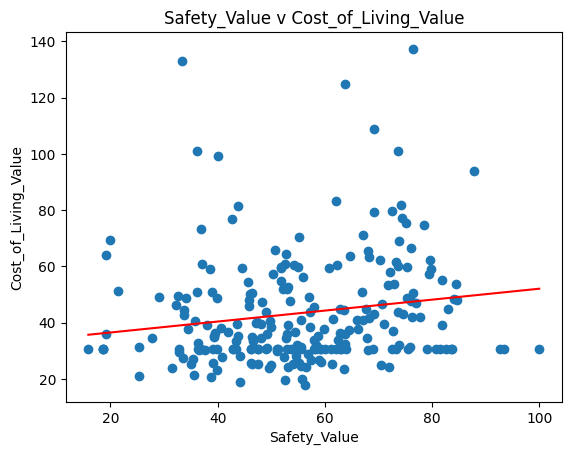

In [4820]:
plt.title("Safety_Value v Cost_of_Living_Value")
plt.xlabel("Safety_Value")
plt.ylabel("Cost_of_Living_Value")
plt.scatter(CountryData_Clean.Safety_Value, CountryData_Clean.Cost_of_Living_Value)
plt.plot(np.unique(CountryData_Clean.Safety_Value), np.poly1d(np.polyfit(CountryData_Clean.Safety_Value, CountryData_Clean.Cost_of_Living_Value, 1))(np.unique(CountryData_Clean.Safety_Value)), color='red')

In [4821]:
corr = pearsonr(CountryData_Clean.Safety_Value, CountryData_Clean.Cost_of_Living_Value)
print(corr)

PearsonRResult(statistic=np.float64(0.16403429082204415), pvalue=np.float64(0.011613346261261658))


In [4822]:
data = sm.add_constant(CountryData_Clean['Safety_Value'])
model = sm.OLS(CountryData_Clean['Cost_of_Living_Value'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                             OLS Regression Results                             
Dep. Variable:     Cost_of_Living_Value   R-squared:                       0.027
Model:                              OLS   Adj. R-squared:                  0.023
Method:                   Least Squares   F-statistic:                     6.470
Date:                  Fri, 02 May 2025   Prob (F-statistic):             0.0116
Time:                          18:14:33   Log-Likelihood:                -1032.8
No. Observations:                   236   AIC:                             2070.
Df Residuals:                       234   BIC:                             2076.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           32.5974     

In [4823]:
# plt.title("Safety_Value v Property_Price_to_Income_Category")
# plt.xlabel("Safety_Value")
# plt.ylabel("Property_Price_to_Income_Category")
# plt.scatter(CountryData_Clean.Safety_Value, CountryData_Clean.Property_Price_to_Income_Category)
# plt.plot(np.unique(CountryData_Clean.Safety_Value), np.poly1d(np.polyfit(CountryData_Clean.Safety_Value, CountryData_Clean.Property_Price_to_Income_Category, 1))(np.unique(CountryData_Clean.Safety_Value)), color='red')

In [4824]:
# corr = pearsonr(CountryData_Clean.Safety_Value, CountryData_Clean.Property_Price_to_Income_Category)
# print(corr)

In [4825]:
# data = sm.add_constant(CountryData_Clean['Safety_Value'])
# model = sm.OLS(CountryData_Clean['Property_Price_to_Income_Category'], data)
# result = model.fit()
# print(result.summary())
# # Line below is for the standard error
# print(result.scale**0.5)

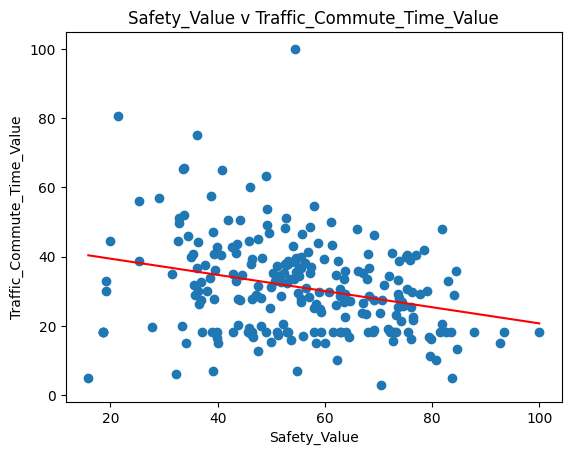

In [4826]:
plt.title("Safety_Value v Traffic_Commute_Time_Value")
plt.xlabel("Safety_Value")
plt.ylabel("Traffic_Commute_Time_Value")
plt.scatter(CountryData_Clean.Safety_Value, CountryData_Clean.Traffic_Commute_Time_Value)
plt.plot(np.unique(CountryData_Clean.Safety_Value), np.poly1d(np.polyfit(CountryData_Clean.Safety_Value, CountryData_Clean.Traffic_Commute_Time_Value, 1))(np.unique(CountryData_Clean.Safety_Value)), color='red')

In [4827]:
corr = pearsonr(CountryData_Clean.Safety_Value, CountryData_Clean.Traffic_Commute_Time_Value)
print(corr)

PearsonRResult(statistic=np.float64(-0.2777796265420156), pvalue=np.float64(1.4897584796865773e-05))


In [4828]:
data = sm.add_constant(CountryData_Clean['Safety_Value'])
model = sm.OLS(CountryData_Clean['Traffic_Commute_Time_Value'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                                OLS Regression Results                                
Dep. Variable:     Traffic_Commute_Time_Value   R-squared:                       0.077
Model:                                    OLS   Adj. R-squared:                  0.073
Method:                         Least Squares   F-statistic:                     19.57
Date:                        Fri, 02 May 2025   Prob (F-statistic):           1.49e-05
Time:                                18:14:33   Log-Likelihood:                -945.46
No. Observations:                         236   AIC:                             1895.
Df Residuals:                             234   BIC:                             1902.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

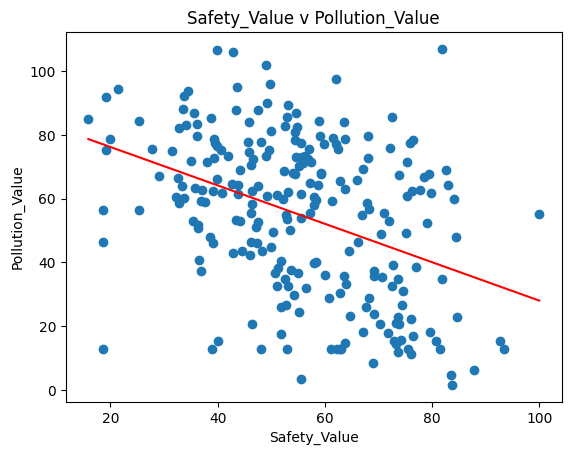

In [4829]:
plt.title("Safety_Value v Pollution_Value")
plt.xlabel("Safety_Value")
plt.ylabel("Pollution_Value")
plt.scatter(CountryData_Clean.Safety_Value, CountryData_Clean.Pollution_Value)
plt.plot(np.unique(CountryData_Clean.Safety_Value), np.poly1d(np.polyfit(CountryData_Clean.Safety_Value, CountryData_Clean.Pollution_Value, 1))(np.unique(CountryData_Clean.Safety_Value)), color='red')

In [4830]:
corr = pearsonr(CountryData_Clean.Safety_Value, CountryData_Clean.Pollution_Value)
print(corr)

PearsonRResult(statistic=np.float64(-0.4009573623569208), pvalue=np.float64(1.5809233131318723e-10))


In [4831]:
data = sm.add_constant(CountryData_Clean['Safety_Value'])
model = sm.OLS(CountryData_Clean['Pollution_Value'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:        Pollution_Value   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     44.83
Date:                Fri, 02 May 2025   Prob (F-statistic):           1.58e-10
Time:                        18:14:33   Log-Likelihood:                -1070.6
No. Observations:                 236   AIC:                             2145.
Df Residuals:                     234   BIC:                             2152.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           88.1896      5.192     16.987   

In [4832]:
# plt.title("Safety_Value v Quality_of_Life_Category")
# plt.xlabel("Safety_Value")
# plt.ylabel("Quality_of_Life_Category")
# plt.scatter(CountryData_Clean.Safety_Value, CountryData_Clean.Quality_of_Life_Category)
# plt.plot(np.unique(CountryData_Clean.Safety_Value), np.poly1d(np.polyfit(CountryData_Clean.Safety_Value, CountryData_Clean.Quality_of_Life_Category, 1))(np.unique(CountryData_Clean.Safety_Value)), color='red')

In [4833]:
# corr = pearsonr(CountryData_Clean.Safety_Value, CountryData_Clean.Quality_of_Life_Category)
# print(corr)

In [4834]:
# data = sm.add_constant(CountryData_Clean['Safety_Value'])
# model = sm.OLS(CountryData_Clean['Quality_of_Life_Category'], data)
# result = model.fit()
# print(result.summary())
# # Line below is for the standard error
# print(result.scale**0.5)

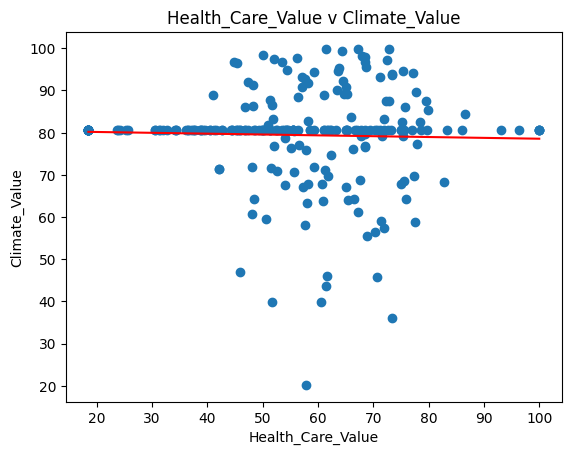

In [4835]:
plt.title("Health_Care_Value v Climate_Value")
plt.xlabel("Health_Care_Value")
plt.ylabel("Climate_Value")
plt.scatter(CountryData_Clean.Health_Care_Value, CountryData_Clean.Climate_Value)
plt.plot(np.unique(CountryData_Clean.Health_Care_Value), np.poly1d(np.polyfit(CountryData_Clean.Health_Care_Value, CountryData_Clean.Climate_Value, 1))(np.unique(CountryData_Clean.Health_Care_Value)), color='red')

In [4836]:
corr = pearsonr(CountryData_Clean.Health_Care_Value, CountryData_Clean.Climate_Value)
print(corr)

PearsonRResult(statistic=np.float64(-0.03128608197198263), pvalue=np.float64(0.6325142078266632))


In [4837]:
data = sm.add_constant(CountryData_Clean['Health_Care_Value'])
model = sm.OLS(CountryData_Clean['Climate_Value'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:          Climate_Value   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.2293
Date:                Fri, 02 May 2025   Prob (F-statistic):              0.633
Time:                        18:14:34   Log-Likelihood:                -907.64
No. Observations:                 236   AIC:                             1819.
Df Residuals:                     234   BIC:                             1826.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                80.5655      2.44

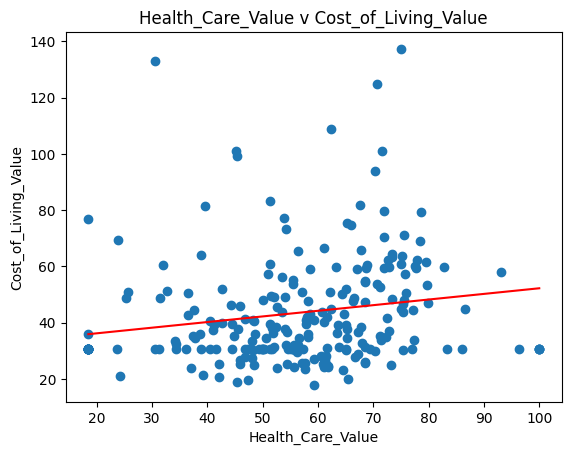

In [4838]:
plt.title("Health_Care_Value v Cost_of_Living_Value")
plt.xlabel("Health_Care_Value")
plt.ylabel("Cost_of_Living_Value")
plt.scatter(CountryData_Clean.Health_Care_Value, CountryData_Clean.Cost_of_Living_Value)
plt.plot(np.unique(CountryData_Clean.Health_Care_Value), np.poly1d(np.polyfit(CountryData_Clean.Health_Care_Value, CountryData_Clean.Cost_of_Living_Value, 1))(np.unique(CountryData_Clean.Health_Care_Value)), color='red')

In [4839]:
corr = pearsonr(CountryData_Clean.Health_Care_Value, CountryData_Clean.Cost_of_Living_Value)
print(corr)

PearsonRResult(statistic=np.float64(0.18207855082702645), pvalue=np.float64(0.005019429419374813))


In [4840]:
data = sm.add_constant(CountryData_Clean['Health_Care_Value'])
model = sm.OLS(CountryData_Clean['Cost_of_Living_Value'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                             OLS Regression Results                             
Dep. Variable:     Cost_of_Living_Value   R-squared:                       0.033
Model:                              OLS   Adj. R-squared:                  0.029
Method:                   Least Squares   F-statistic:                     8.024
Date:                  Fri, 02 May 2025   Prob (F-statistic):            0.00502
Time:                          18:14:34   Log-Likelihood:                -1032.0
No. Observations:                   236   AIC:                             2068.
Df Residuals:                       234   BIC:                             2075.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             

In [4841]:
# plt.title("Health_Care_Value v Property_Price_to_Income_Category")
# plt.xlabel("Health_Care_Value")
# plt.ylabel("Property_Price_to_Income_Category")
# plt.scatter(CountryData_Clean.Health_Care_Value, CountryData_Clean.Property_Price_to_Income_Category)
# plt.plot(np.unique(CountryData_Clean.Health_Care_Value), np.poly1d(np.polyfit(CountryData_Clean.Health_Care_Value, CountryData_Clean.Property_Price_to_Income_Category, 1))(np.unique(CountryData_Clean.Health_Care_Value)), color='red')

In [4842]:
# corr = pearsonr(CountryData_Clean.Health_Care_Value, CountryData_Clean.Property_Price_to_Income_Category)
# print(corr)

In [4843]:
# data = sm.add_constant(CountryData_Clean['Health_Care_Value'])
# model = sm.OLS(CountryData_Clean['Property_Price_to_Income_Category'], data)
# result = model.fit()
# print(result.summary())
# # Line below is for the standard error
# print(result.scale**0.5)

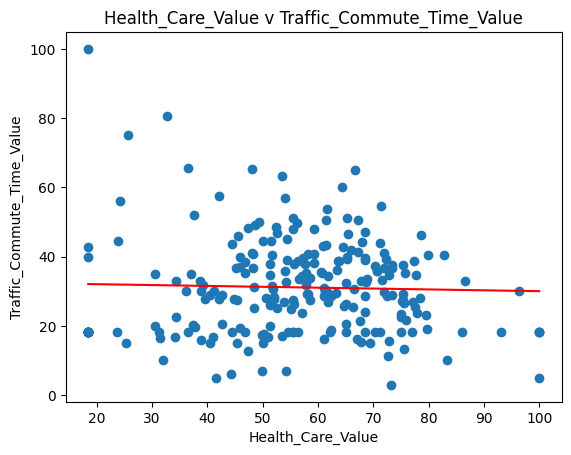

In [4844]:
plt.title("Health_Care_Value v Traffic_Commute_Time_Value")
plt.xlabel("Health_Care_Value")
plt.ylabel("Traffic_Commute_Time_Value")
plt.scatter(CountryData_Clean.Health_Care_Value, CountryData_Clean.Traffic_Commute_Time_Value)
plt.plot(np.unique(CountryData_Clean.Health_Care_Value), np.poly1d(np.polyfit(CountryData_Clean.Health_Care_Value, CountryData_Clean.Traffic_Commute_Time_Value, 1))(np.unique(CountryData_Clean.Health_Care_Value)), color='red')

In [4845]:
corr = pearsonr(CountryData_Clean.Health_Care_Value, CountryData_Clean.Traffic_Commute_Time_Value)
print(corr)

PearsonRResult(statistic=np.float64(-0.032405450875874306), pvalue=np.float64(0.6203821038104574))


In [4846]:
data = sm.add_constant(CountryData_Clean['Health_Care_Value'])
model = sm.OLS(CountryData_Clean['Traffic_Commute_Time_Value'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                                OLS Regression Results                                
Dep. Variable:     Traffic_Commute_Time_Value   R-squared:                       0.001
Model:                                    OLS   Adj. R-squared:                 -0.003
Method:                         Least Squares   F-statistic:                    0.2460
Date:                        Fri, 02 May 2025   Prob (F-statistic):              0.620
Time:                                18:14:34   Log-Likelihood:                -954.82
No. Observations:                         236   AIC:                             1914.
Df Residuals:                             234   BIC:                             1921.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

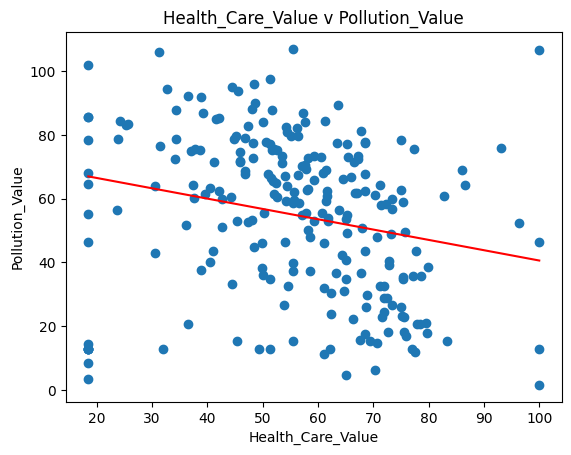

In [4847]:
plt.title("Health_Care_Value v Pollution_Value")
plt.xlabel("Health_Care_Value")
plt.ylabel("Pollution_Value")
plt.scatter(CountryData_Clean.Health_Care_Value, CountryData_Clean.Pollution_Value)
plt.plot(np.unique(CountryData_Clean.Health_Care_Value), np.poly1d(np.polyfit(CountryData_Clean.Health_Care_Value, CountryData_Clean.Pollution_Value, 1))(np.unique(CountryData_Clean.Health_Care_Value)), color='red')

In [4848]:
corr = pearsonr(CountryData_Clean.Health_Care_Value, CountryData_Clean.Pollution_Value)
print(corr)

PearsonRResult(statistic=np.float64(-0.2324496225761401), pvalue=np.float64(0.00031644107633700273))


In [4849]:
data = sm.add_constant(CountryData_Clean['Health_Care_Value'])
model = sm.OLS(CountryData_Clean['Pollution_Value'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:        Pollution_Value   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     13.37
Date:                Fri, 02 May 2025   Prob (F-statistic):           0.000316
Time:                        18:14:34   Log-Likelihood:                -1084.7
No. Observations:                 236   AIC:                             2173.
Df Residuals:                     234   BIC:                             2180.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                72.9353      5.18

In [4850]:
# plt.title("Health_Care_Value v Quality_of_Life_Category")
# plt.xlabel("Health_Care_Value")
# plt.ylabel("Quality_of_Life_Category")
# plt.scatter(CountryData_Clean.Health_Care_Value, CountryData_Clean.Quality_of_Life_Category)
# plt.plot(np.unique(CountryData_Clean.Health_Care_Value), np.poly1d(np.polyfit(CountryData_Clean.Health_Care_Value, CountryData_Clean.Quality_of_Life_Category, 1))(np.unique(CountryData_Clean.Health_Care_Value)), color='red')

In [4851]:
# corr = pearsonr(CountryData_Clean.Health_Care_Value, CountryData_Clean.Quality_of_Life_Category)
# print(corr)

In [4852]:
# data = sm.add_constant(CountryData_Clean['Health_Care_Value'])
# model = sm.OLS(CountryData_Clean['Quality_of_Life_Category'], data)
# result = model.fit()
# print(result.summary())
# # Line below is for the standard error
# print(result.scale**0.5)

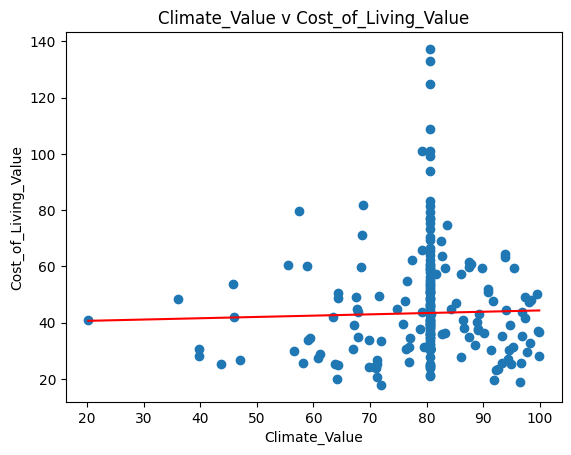

In [4853]:
plt.title("Climate_Value v Cost_of_Living_Value")
plt.xlabel("Climate_Value")
plt.ylabel("Cost_of_Living_Value")
plt.scatter(CountryData_Clean.Climate_Value, CountryData_Clean.Cost_of_Living_Value)
plt.plot(np.unique(CountryData_Clean.Climate_Value), np.poly1d(np.polyfit(CountryData_Clean.Climate_Value, CountryData_Clean.Cost_of_Living_Value, 1))(np.unique(CountryData_Clean.Climate_Value)), color='red')

In [4854]:
corr = pearsonr(CountryData_Clean.Climate_Value, CountryData_Clean.Cost_of_Living_Value)
print(corr)

PearsonRResult(statistic=np.float64(0.026884500138725127), pvalue=np.float64(0.681153985798994))


In [4855]:
data = sm.add_constant(CountryData_Clean['Climate_Value'])
model = sm.OLS(CountryData_Clean['Cost_of_Living_Value'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                             OLS Regression Results                             
Dep. Variable:     Cost_of_Living_Value   R-squared:                       0.001
Model:                              OLS   Adj. R-squared:                 -0.004
Method:                   Least Squares   F-statistic:                    0.1693
Date:                  Fri, 02 May 2025   Prob (F-statistic):              0.681
Time:                          18:14:34   Log-Likelihood:                -1035.9
No. Observations:                   236   AIC:                             2076.
Df Residuals:                       234   BIC:                             2083.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            39.7067  

In [4856]:
# plt.title("Climate_Value v Property_Price_to_Income_Category")
# plt.xlabel("Climate_Value")
# plt.ylabel("Property_Price_to_Income_Category")
# plt.scatter(CountryData_Clean.Climate_Value, CountryData_Clean.Property_Price_to_Income_Category)
# plt.plot(np.unique(CountryData_Clean.Climate_Value), np.poly1d(np.polyfit(CountryData_Clean.Climate_Value, CountryData_Clean.Property_Price_to_Income_Category, 1))(np.unique(CountryData_Clean.Climate_Value)), color='red')

In [4857]:
# corr = pearsonr(CountryData_Clean.Climate_Value, CountryData_Clean.Property_Price_to_Income_Category)
# print(corr)

In [4858]:
# data = sm.add_constant(CountryData_Clean['Climate_Value'])
# model = sm.OLS(CountryData_Clean['Property_Price_to_Income_Category'], data)
# result = model.fit()
# print(result.summary())
# # Line below is for the standard error
# print(result.scale**0.5)

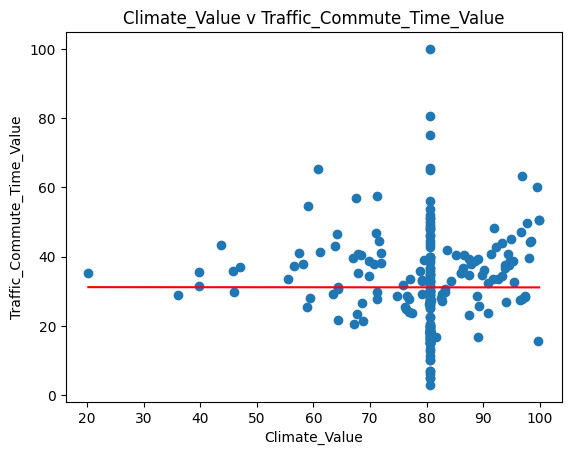

In [4859]:
plt.title("Climate_Value v Traffic_Commute_Time_Value")
plt.xlabel("Climate_Value")
plt.ylabel("Traffic_Commute_Time_Value")
plt.scatter(CountryData_Clean.Climate_Value, CountryData_Clean.Traffic_Commute_Time_Value)
plt.plot(np.unique(CountryData_Clean.Climate_Value), np.poly1d(np.polyfit(CountryData_Clean.Climate_Value, CountryData_Clean.Traffic_Commute_Time_Value, 1))(np.unique(CountryData_Clean.Climate_Value)), color='red')

In [4860]:
corr = pearsonr(CountryData_Clean.Climate_Value, CountryData_Clean.Traffic_Commute_Time_Value)
print(corr)

PearsonRResult(statistic=np.float64(-0.0007178870429955242), pvalue=np.float64(0.9912475132411217))


In [4861]:
data = sm.add_constant(CountryData_Clean['Climate_Value'])
model = sm.OLS(CountryData_Clean['Traffic_Commute_Time_Value'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                                OLS Regression Results                                
Dep. Variable:     Traffic_Commute_Time_Value   R-squared:                       0.000
Model:                                    OLS   Adj. R-squared:                 -0.004
Method:                         Least Squares   F-statistic:                 0.0001206
Date:                        Fri, 02 May 2025   Prob (F-statistic):              0.991
Time:                                18:14:35   Log-Likelihood:                -954.94
No. Observations:                         236   AIC:                             1914.
Df Residuals:                             234   BIC:                             1921.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

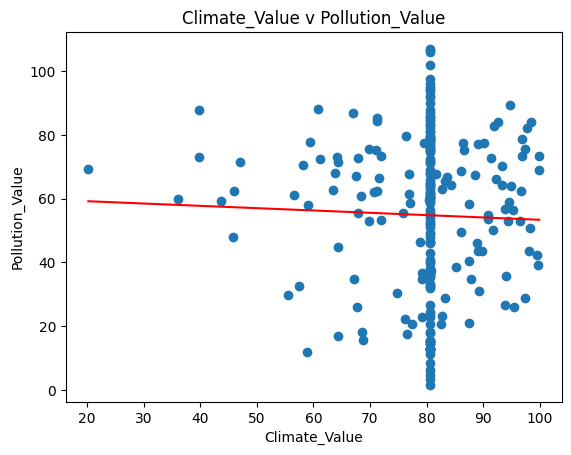

In [4862]:
plt.title("Climate_Value v Pollution_Value")
plt.xlabel("Climate_Value")
plt.ylabel("Pollution_Value")
plt.scatter(CountryData_Clean.Climate_Value, CountryData_Clean.Pollution_Value)
plt.plot(np.unique(CountryData_Clean.Climate_Value), np.poly1d(np.polyfit(CountryData_Clean.Climate_Value, CountryData_Clean.Pollution_Value, 1))(np.unique(CountryData_Clean.Climate_Value)), color='red')

In [4863]:
corr = pearsonr(CountryData_Clean.Climate_Value, CountryData_Clean.Pollution_Value)
print(corr)

PearsonRResult(statistic=np.float64(-0.03341328317765037), pvalue=np.float64(0.6095458635580033))


In [4864]:
data = sm.add_constant(CountryData_Clean['Climate_Value'])
model = sm.OLS(CountryData_Clean['Pollution_Value'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:        Pollution_Value   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.2615
Date:                Fri, 02 May 2025   Prob (F-statistic):              0.610
Time:                        18:14:35   Log-Likelihood:                -1091.1
No. Observations:                 236   AIC:                             2186.
Df Residuals:                     234   BIC:                             2193.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            60.6423     11.409      5.315

In [4865]:
# plt.title("Climate_Value v Quality_of_Life_Category")
# plt.xlabel("Climate_Value")
# plt.ylabel("Quality_of_Life_Category")
# plt.scatter(CountryData_Clean.Climate_Value, CountryData_Clean.Quality_of_Life_Category)
# plt.plot(np.unique(CountryData_Clean.Climate_Value), np.poly1d(np.polyfit(CountryData_Clean.Climate_Value, CountryData_Clean.Quality_of_Life_Category, 1))(np.unique(CountryData_Clean.Climate_Value)), color='red')

In [4866]:
# corr = pearsonr(CountryData_Clean.Climate_Value, CountryData_Clean.Quality_of_Life_Category)
# print(corr)

In [4867]:
# data = sm.add_constant(CountryData_Clean['Climate_Value'])
# model = sm.OLS(CountryData_Clean['Quality_of_Life_Category'], data)
# result = model.fit()
# print(result.summary())
# # Line below is for the standard error
# print(result.scale**0.5)

In [4868]:
# plt.title("Cost_of_Living_Value v Property_Price_to_Income_Category")
# plt.xlabel("Cost_of_Living_Value")
# plt.ylabel("Property_Price_to_Income_Category")
# plt.scatter(CountryData_Clean.Cost_of_Living_Value, CountryData_Clean.Property_Price_to_Income_Category)
# plt.plot(np.unique(CountryData_Clean.Cost_of_Living_Value), np.poly1d(np.polyfit(CountryData_Clean.Cost_of_Living_Value, CountryData_Clean.Property_Price_to_Income_Category, 1))(np.unique(CountryData_Clean.Cost_of_Living_Value)), color='red')

In [4869]:
# corr = pearsonr(CountryData_Clean.Cost_of_Living_Value, CountryData_Clean.Property_Price_to_Income_Category)
# print(corr)

In [4870]:
# data = sm.add_constant(CountryData_Clean['Cost_of_Living_Value'])
# model = sm.OLS(CountryData_Clean['Property_Price_to_Income_Category'], data)
# result = model.fit()
# print(result.summary())
# # Line below is for the standard error
# print(result.scale**0.5)

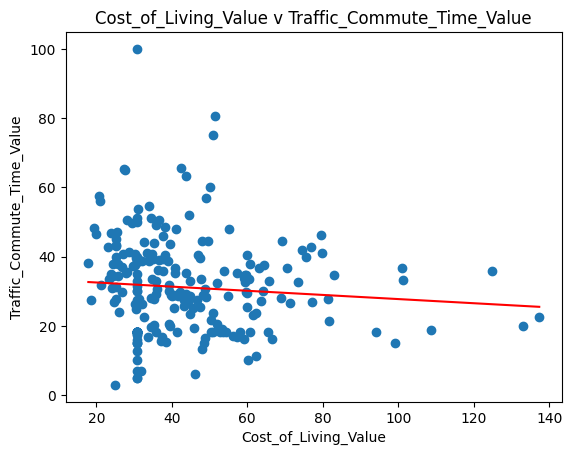

In [4871]:
plt.title("Cost_of_Living_Value v Traffic_Commute_Time_Value")
plt.xlabel("Cost_of_Living_Value")
plt.ylabel("Traffic_Commute_Time_Value")
plt.scatter(CountryData_Clean.Cost_of_Living_Value, CountryData_Clean.Traffic_Commute_Time_Value)
plt.plot(np.unique(CountryData_Clean.Cost_of_Living_Value), np.poly1d(np.polyfit(CountryData_Clean.Cost_of_Living_Value, CountryData_Clean.Traffic_Commute_Time_Value, 1))(np.unique(CountryData_Clean.Cost_of_Living_Value)), color='red')

In [4872]:
corr = pearsonr(CountryData_Clean.Cost_of_Living_Value, CountryData_Clean.Traffic_Commute_Time_Value)
print(corr)

PearsonRResult(statistic=np.float64(-0.0844679389043409), pvalue=np.float64(0.19599606926051394))


In [4873]:
data = sm.add_constant(CountryData_Clean['Cost_of_Living_Value'])
model = sm.OLS(CountryData_Clean['Traffic_Commute_Time_Value'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                                OLS Regression Results                                
Dep. Variable:     Traffic_Commute_Time_Value   R-squared:                       0.007
Model:                                    OLS   Adj. R-squared:                  0.003
Method:                         Least Squares   F-statistic:                     1.682
Date:                        Fri, 02 May 2025   Prob (F-statistic):              0.196
Time:                                18:14:35   Log-Likelihood:                -954.09
No. Observations:                         236   AIC:                             1912.
Df Residuals:                             234   BIC:                             1919.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

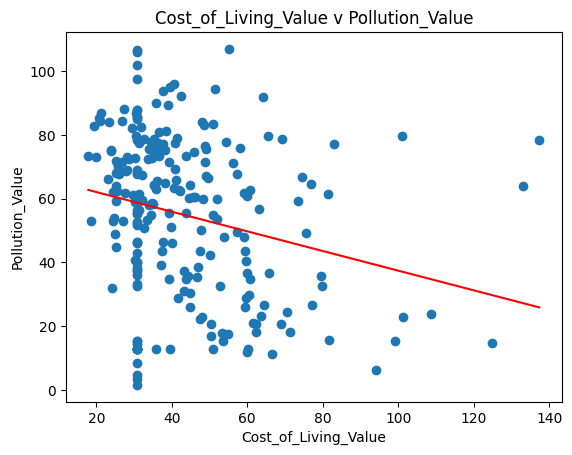

In [4874]:
plt.title("Cost_of_Living_Value v Pollution_Value")
plt.xlabel("Cost_of_Living_Value")
plt.ylabel("Pollution_Value")
plt.scatter(CountryData_Clean.Cost_of_Living_Value, CountryData_Clean.Pollution_Value)
plt.plot(np.unique(CountryData_Clean.Cost_of_Living_Value), np.poly1d(np.polyfit(CountryData_Clean.Cost_of_Living_Value, CountryData_Clean.Pollution_Value, 1))(np.unique(CountryData_Clean.Cost_of_Living_Value)), color='red')

In [4875]:
corr = pearsonr(CountryData_Clean.Cost_of_Living_Value, CountryData_Clean.Pollution_Value)
print(corr)

PearsonRResult(statistic=np.float64(-0.2434414473868441), pvalue=np.float64(0.0001587669369966179))


In [4876]:
data = sm.add_constant(CountryData_Clean['Cost_of_Living_Value'])
model = sm.OLS(CountryData_Clean['Pollution_Value'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:        Pollution_Value   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     14.74
Date:                Fri, 02 May 2025   Prob (F-statistic):           0.000159
Time:                        18:14:35   Log-Likelihood:                -1084.0
No. Observations:                 236   AIC:                             2172.
Df Residuals:                     234   BIC:                             2179.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   68.2145 

In [4877]:
# plt.title("Cost_of_Living_Value v Quality_of_Life_Category")
# plt.xlabel("Cost_of_Living_Value")
# plt.ylabel("Quality_of_Life_Category")
# plt.scatter(CountryData_Clean.Cost_of_Living_Value, CountryData_Clean.Quality_of_Life_Category)
# plt.plot(np.unique(CountryData_Clean.Cost_of_Living_Value), np.poly1d(np.polyfit(CountryData_Clean.Cost_of_Living_Value, CountryData_Clean.Quality_of_Life_Category, 1))(np.unique(CountryData_Clean.Cost_of_Living_Value)), color='red')

In [4878]:
# corr = pearsonr(CountryData_Clean.Cost_of_Living_Value, CountryData_Clean.Quality_of_Life_Category)
# print(corr)

In [4879]:
# data = sm.add_constant(CountryData_Clean['Cost_of_Living_Value'])
# model = sm.OLS(CountryData_Clean['Quality_of_Life_Category'], data)
# result = model.fit()
# print(result.summary())
# # Line below is for the standard error
# print(result.scale**0.5)

In [4880]:
# plt.title("Property_Price_to_Income_Category v Traffic_Commute_Time_Value")
# plt.xlabel("Property_Price_to_Income_Category")
# plt.ylabel("Traffic_Commute_Time_Value")
# plt.scatter(CountryData_Clean.Property_Price_to_Income_Category, CountryData_Clean.Traffic_Commute_Time_Value)
# plt.plot(np.unique(CountryData_Clean.Property_Price_to_Income_Category), np.poly1d(np.polyfit(CountryData_Clean.Property_Price_to_Income_Category, CountryData_Clean.Traffic_Commute_Time_Value, 1))(np.unique(CountryData_Clean.Property_Price_to_Income_Category)), color='red')

In [4881]:
# corr = pearsonr(CountryData_Clean.Property_Price_to_Income_Category, CountryData_Clean.Traffic_Commute_Time_Value)
# print(corr)

In [4882]:
# data = sm.add_constant(CountryData_Clean['Property_Price_to_Income_Category'])
# model = sm.OLS(CountryData_Clean['Traffic_Commute_Time_Value'], data)
# result = model.fit()
# print(result.summary())
# # Line below is for the standard error
# print(result.scale**0.5)

In [4883]:
# plt.title("Property_Price_to_Income_Category v Pollution_Value")
# plt.xlabel("Property_Price_to_Income_Category")
# plt.ylabel("Pollution_Value")
# plt.scatter(CountryData_Clean.Property_Price_to_Income_Category, CountryData_Clean.Pollution_Value)
# plt.plot(np.unique(CountryData_Clean.Property_Price_to_Income_Category), np.poly1d(np.polyfit(CountryData_Clean.Property_Price_to_Income_Category, CountryData_Clean.Pollution_Value, 1))(np.unique(CountryData_Clean.Property_Price_to_Income_Category)), color='red')

In [4884]:
# corr = pearsonr(CountryData_Clean.Property_Price_to_Income_Category, CountryData_Clean.Pollution_Value)
# print(corr)

In [4885]:
# data = sm.add_constant(CountryData_Clean['Property_Price_to_Income_Category'])
# model = sm.OLS(CountryData_Clean['Pollution_Value'], data)
# result = model.fit()
# print(result.summary())
# # Line below is for the standard error
# print(result.scale**0.5)

In [4886]:
# plt.title("Property_Price_to_Income_Category v Quality_of_Life_Category")
# plt.xlabel("Property_Price_to_Income_Category")
# plt.ylabel("Quality_of_Life_Category")
# plt.scatter(CountryData_Clean.Property_Price_to_Income_Category, CountryData_Clean.Quality_of_Life_Category)
# plt.plot(np.unique(CountryData_Clean.Property_Price_to_Income_Category), np.poly1d(np.polyfit(CountryData_Clean.Property_Price_to_Income_Category, CountryData_Clean.Quality_of_Life_Category, 1))(np.unique(CountryData_Clean.Property_Price_to_Income_Category)), color='red')

In [4887]:
# corr = pearsonr(CountryData_Clean.Property_Price_to_Income_Category, CountryData_Clean.Quality_of_Life_Category)
# print(corr)

In [4888]:
# data = sm.add_constant(CountryData_Clean['Property_Price_to_Income_Category'])
# model = sm.OLS(CountryData_Clean['Quality_of_Life_Category'], data)
# result = model.fit()
# print(result.summary())
# # Line below is for the standard error
# print(result.scale**0.5)

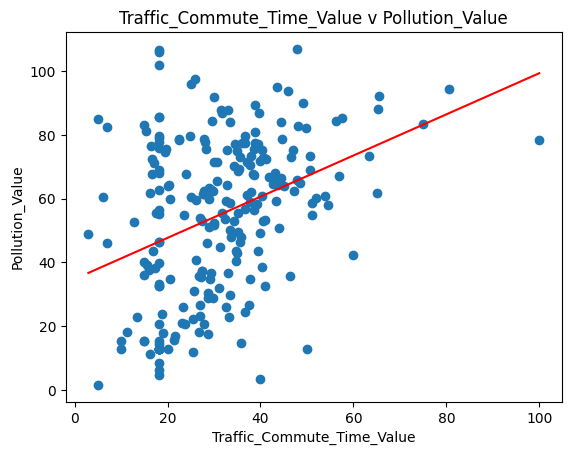

In [4889]:
plt.title("Traffic_Commute_Time_Value v Pollution_Value")
plt.xlabel("Traffic_Commute_Time_Value")
plt.ylabel("Pollution_Value")
plt.scatter(CountryData_Clean.Traffic_Commute_Time_Value, CountryData_Clean.Pollution_Value)
plt.plot(np.unique(CountryData_Clean.Traffic_Commute_Time_Value), np.poly1d(np.polyfit(CountryData_Clean.Traffic_Commute_Time_Value, CountryData_Clean.Pollution_Value, 1))(np.unique(CountryData_Clean.Traffic_Commute_Time_Value)), color='red')

In [4890]:
corr = pearsonr(CountryData_Clean.Traffic_Commute_Time_Value, CountryData_Clean.Pollution_Value)
print(corr)

PearsonRResult(statistic=np.float64(0.361592298849287), pvalue=np.float64(1.0645313783373304e-08))


In [4891]:
data = sm.add_constant(CountryData_Clean['Traffic_Commute_Time_Value'])
model = sm.OLS(CountryData_Clean['Pollution_Value'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:        Pollution_Value   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     35.20
Date:                Fri, 02 May 2025   Prob (F-statistic):           1.06e-08
Time:                        18:14:35   Log-Likelihood:                -1074.7
No. Observations:                 236   AIC:                             2153.
Df Residuals:                     234   BIC:                             2160.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [4892]:
# plt.title("Traffic_Commute_Time_Value v Quality_of_Life_Category")
# plt.xlabel("Traffic_Commute_Time_Value")
# plt.ylabel("Quality_of_Life_Category")
# plt.scatter(CountryData_Clean.Traffic_Commute_Time_Value, CountryData_Clean.Quality_of_Life_Category)
# plt.plot(np.unique(CountryData_Clean.Traffic_Commute_Time_Value), np.poly1d(np.polyfit(CountryData_Clean.Traffic_Commute_Time_Value, CountryData_Clean.Quality_of_Life_Category, 1))(np.unique(CountryData_Clean.Traffic_Commute_Time_Value)), color='red')

In [4893]:
# corr = pearsonr(CountryData_Clean.Traffic_Commute_Time_Value, CountryData_Clean.Quality_of_Life_Category)
# print(corr)

In [4894]:
# data = sm.add_constant(CountryData_Clean['Traffic_Commute_Time_Value'])
# model = sm.OLS(CountryData_Clean['Quality_of_Life_Category'], data)
# result = model.fit()
# print(result.summary())
# # Line below is for the standard error
# print(result.scale**0.5)

In [4895]:
# plt.title("Pollution_Value v Quality_of_Life_Category")
# plt.xlabel("Pollution_Value")
# plt.ylabel("Quality_of_Life_Category")
# plt.scatter(CountryData_Clean.Pollution_Value, CountryData_Clean.Quality_of_Life_Category)
# plt.plot(np.unique(CountryData_Clean.Pollution_Value), np.poly1d(np.polyfit(CountryData_Clean.Pollution_Value, CountryData_Clean.Quality_of_Life_Category, 1))(np.unique(CountryData_Clean.Pollution_Value)), color='red')

In [4896]:
# corr = pearsonr(CountryData_Clean.Pollution_Value, CountryData_Clean.Quality_of_Life_Category)
# print(corr)

In [4897]:
data = sm.add_constant(CountryData_Clean['Pollution_Value'])
model = sm.OLS(CountryData_Clean['Quality_of_Life_Value'], data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                              OLS Regression Results                             
Dep. Variable:     Quality_of_Life_Value   R-squared:                       0.085
Model:                               OLS   Adj. R-squared:                  0.081
Method:                    Least Squares   F-statistic:                     21.74
Date:                   Fri, 02 May 2025   Prob (F-statistic):           5.26e-06
Time:                           18:14:35   Log-Likelihood:                -1194.7
No. Observations:                    236   AIC:                             2393.
Df Residuals:                        234   BIC:                             2400.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const       

Multivariate Analysis

In [4898]:
all_country_data = list(zip(CountryData_Clean.Purchasing_Power_Value,CountryData_Clean.Safety_Value,CountryData_Clean.Health_Care_Value,CountryData_Clean.Climate_Value,CountryData_Clean.Cost_of_Living_Value,CountryData_Clean.Property_Price_to_Income_Value,CountryData_Clean.Pollution_Value,CountryData_Clean.Traffic_Commute_Time_Value))


In [4899]:
all_country_data = sm.add_constant(all_country_data)
model = sm.OLS(CountryData_Clean.Quality_of_Life_Value, all_country_data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                              OLS Regression Results                             
Dep. Variable:     Quality_of_Life_Value   R-squared:                       0.408
Model:                               OLS   Adj. R-squared:                  0.387
Method:                    Least Squares   F-statistic:                     19.54
Date:                   Fri, 02 May 2025   Prob (F-statistic):           2.70e-22
Time:                           18:14:35   Log-Likelihood:                -1143.4
No. Observations:                    236   AIC:                             2305.
Df Residuals:                        227   BIC:                             2336.
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         65.5910 

In [4900]:
# CountryData_Merged = CountryData_Clean.merge(median_salaries, on='Country', how='left')
# CountryData_Merged.rename(columns={'Salary': 'Median_Salary'}, inplace=True)
# df = CountryData_Merged.dropna(subset=all_country_data + ['Quality_of_Life_Value'])

# all_country_data = sm.add_constant(df[all_country_data])
# model = sm.OLS(df['Quality_of_Life_Value'], all_country_data)
# result = model.fit()
# print(result.summary())
# # Line below is for the standard error
# print(result.scale**0.5)


In [4901]:
features = ['Purchasing_Power_Value', 'Health_Care_Value', 'Cost_of_Living_Value', 'Pollution_Value', 'Median_Salary']

df = CountryData_Merged.dropna(subset=features + ['Quality_of_Life_Value'])
model = sm.OLS(df['Quality_of_Life_Value'], df[features])
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)


                                  OLS Regression Results                                  
Dep. Variable:     Quality_of_Life_Value   R-squared (uncentered):                   0.922
Model:                               OLS   Adj. R-squared (uncentered):              0.920
Method:                    Least Squares   F-statistic:                              465.9
Date:                   Fri, 02 May 2025   Prob (F-statistic):                   2.12e-107
Time:                           18:14:35   Log-Likelihood:                         -993.62
No. Observations:                    203   AIC:                                      1997.
Df Residuals:                        198   BIC:                                      2014.
Df Model:                              5                                                  
Covariance Type:               nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]

5.Normalization 

In [4902]:
features = ['Median_Salary', 'Purchasing_Power_Value', 'Quality_of_Life_Value', 'Climate_Value']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

print(X_scaled_df.head())


   Median_Salary  Purchasing_Power_Value  Quality_of_Life_Value  Climate_Value
0      -0.448989               -0.622236              -0.695208       0.108835
1      -0.500264               -0.395665              -0.087051       0.589449
2      -0.317635               -0.718853              -0.215528       1.281106
3      -0.183580               -0.788501              -0.695208       0.108835
4       1.202456                1.267414              -0.695208       0.108835


In [4903]:
min_qol_countries = df[df['Quality_of_Life_Category'] == 'Low']
max_qol_country = min_qol_countries.loc[min_qol_countries['Quality_of_Life_Value'].idxmax()]
print(f"Quality of Life Value: {max_qol_country['Quality_of_Life_Value']}")


Quality of Life Value: 116.56


                              OLS Regression Results                             
Dep. Variable:     Quality_of_Life_Value   R-squared:                       1.000
Model:                               OLS   Adj. R-squared:                  1.000
Method:                    Least Squares   F-statistic:                 6.473e+31
Date:                   Fri, 02 May 2025   Prob (F-statistic):               0.00
Time:                           18:14:35   Log-Likelihood:                 6017.5
No. Observations:                    203   AIC:                        -1.202e+04
Df Residuals:                        197   BIC:                        -1.200e+04
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        107.7714 

C:\Users\wwwno\AppData\Local\Temp\ipykernel_1228\2076323779.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Economic_Potential'] = 0.5 * X_scaled[:, 0] + 0.5 * X_scaled[:, 1]
C:\Users\wwwno\AppData\Local\Temp\ipykernel_1228\2076323779.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Living_Standards'] = 0.6 * X_scaled[:, 2] - 0.4 * X_scaled[:, 3]
C:\Users\wwwno\AppData\Local\Temp\ipykernel_1228\2076323779.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

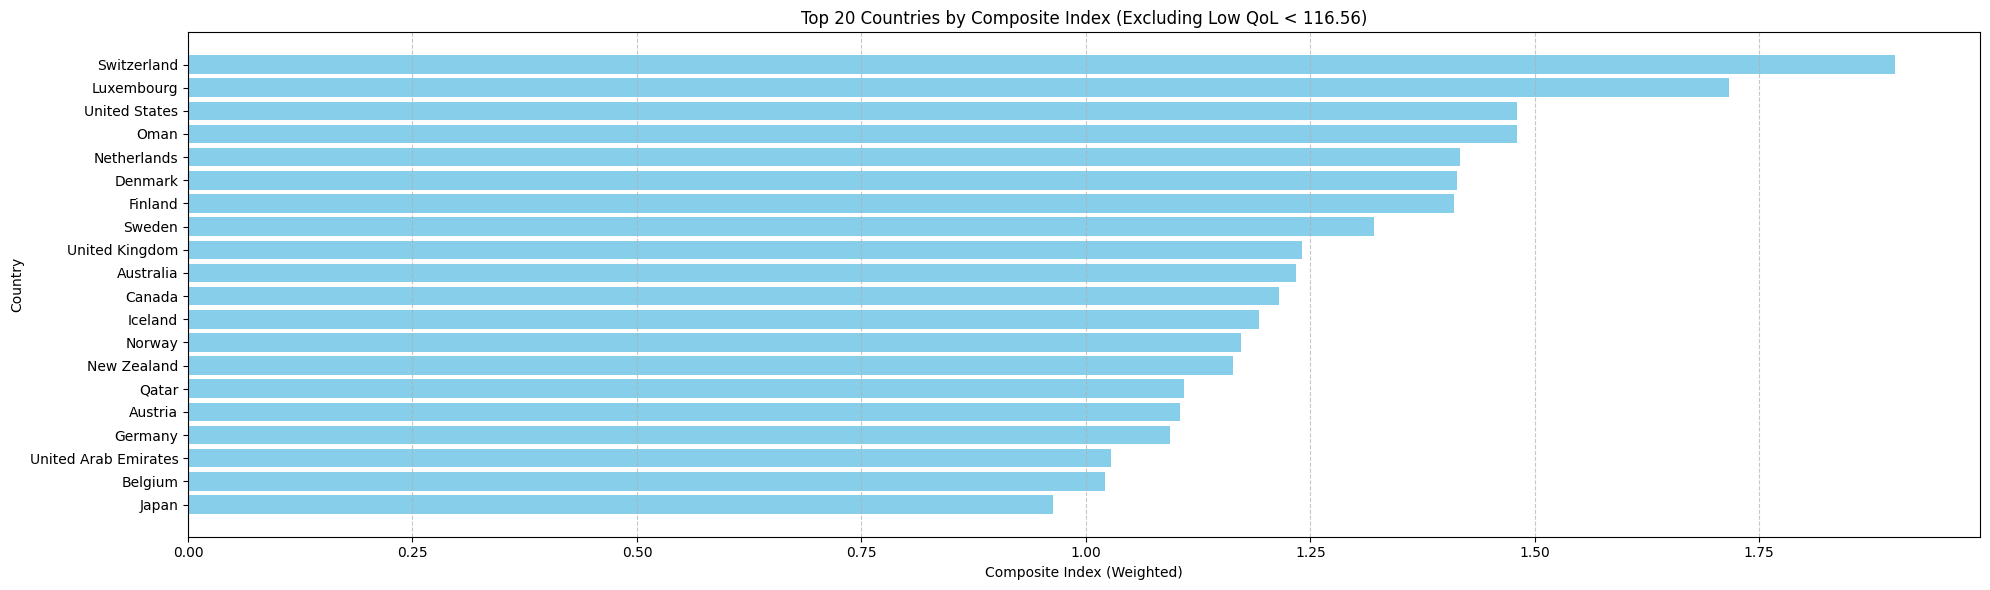

In [4904]:
# https://chatgpt.com/c/6814cbac-c3d0-8000-b906-9245963c426c

features = ['Median_Salary', 'Purchasing_Power_Value', 'Quality_of_Life_Value', 'Cost_of_Living_Value', 'Pollution_Value']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

X_scaled_with_const = sm.add_constant(X_scaled)
y = df['Quality_of_Life_Value']
model_scaled = sm.OLS(y, X_scaled_with_const)
result_scaled = model_scaled.fit()

print(result_scaled.summary())

df['Economic_Potential'] = 0.5 * X_scaled[:, 0] + 0.5 * X_scaled[:, 1] 
df['Living_Standards'] = 0.6 * X_scaled[:, 2] - 0.4 * X_scaled[:, 3]   
df['Environmental_Quality'] = -1 * X_scaled[:, 4]                    

df['Composite_Index'] = (0.40 * df['Economic_Potential'] + 0.35 * df['Living_Standards'] +0.25 * df['Environmental_Quality'])

regression_data_filtered = df[df['Quality_of_Life_Value'] >= 116.56]
top_20_countries = regression_data_filtered[['Country', 'Composite_Index']].sort_values(by='Composite_Index', ascending=False).head(20)

plt.figure(figsize=(20, 6))
plt.barh(top_20_countries['Country'], top_20_countries['Composite_Index'], color='skyblue')
plt.xlabel('Composite Index (Weighted)')
plt.ylabel('Country')
plt.title('Top 20 Countries by Composite Index (Excluding Low QoL < 116.56)')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


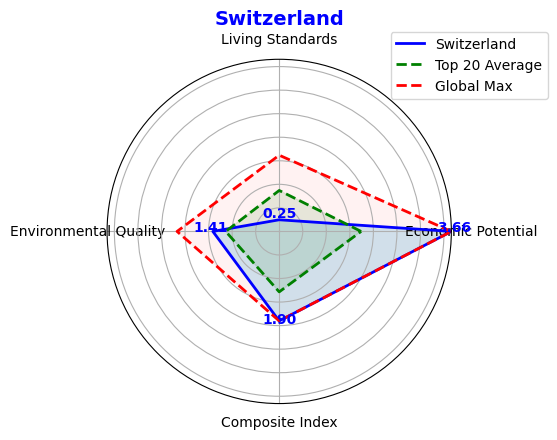

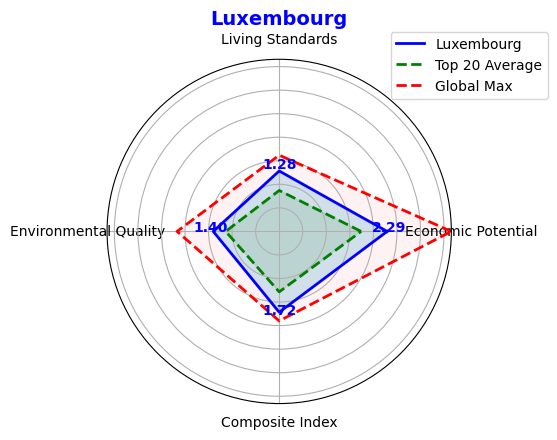

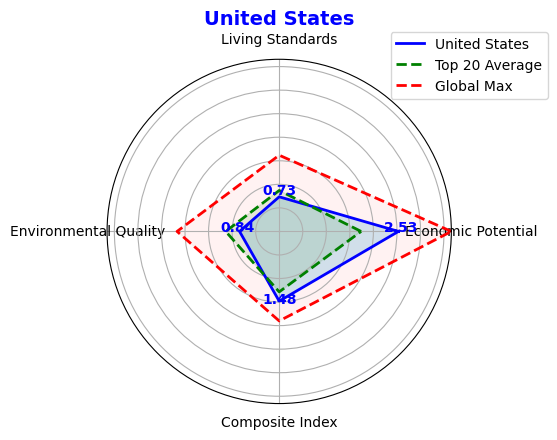

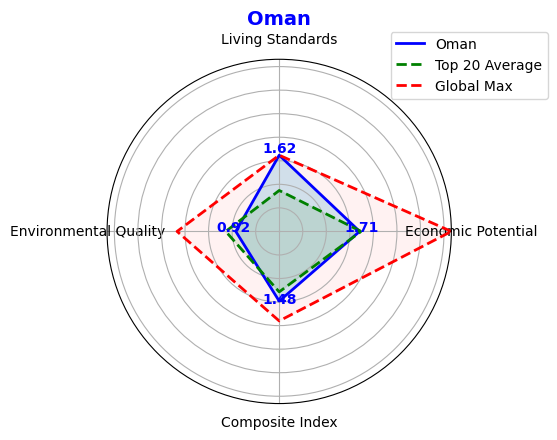

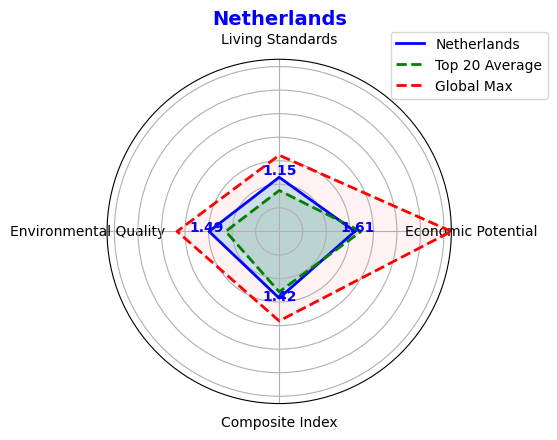

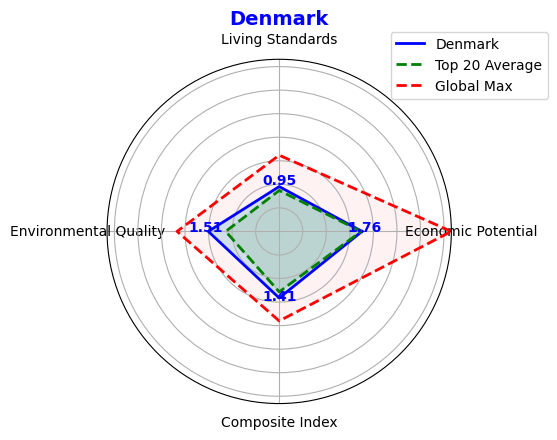

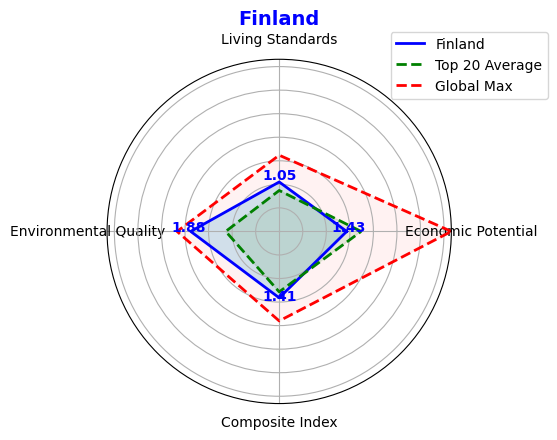

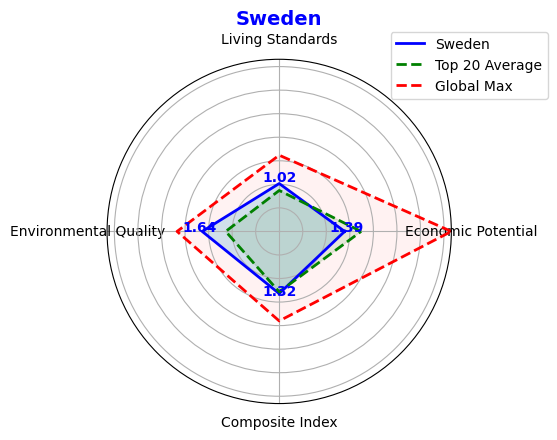

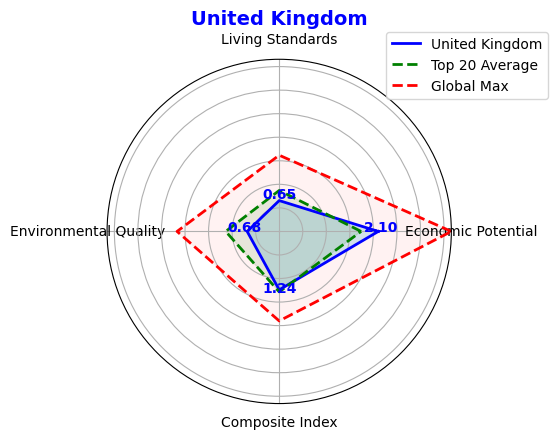

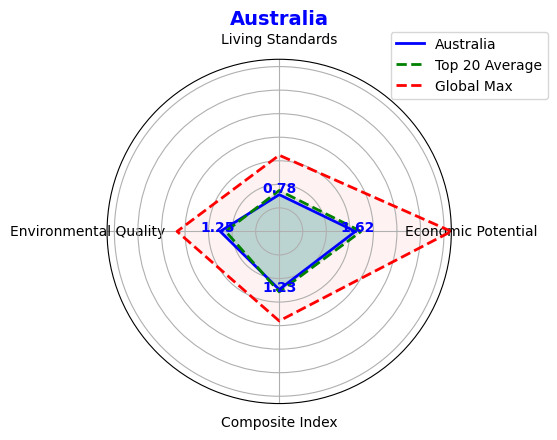

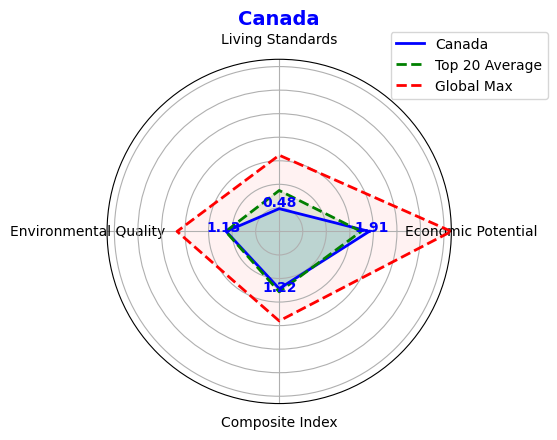

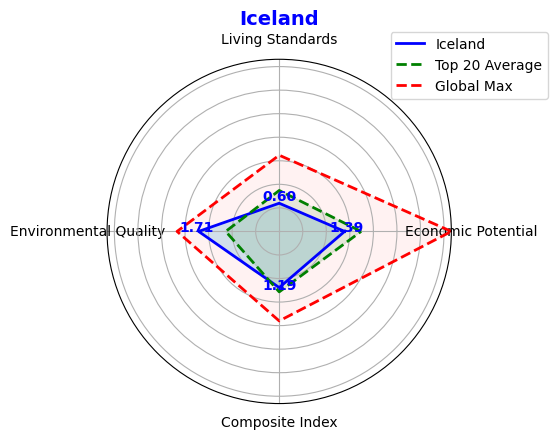

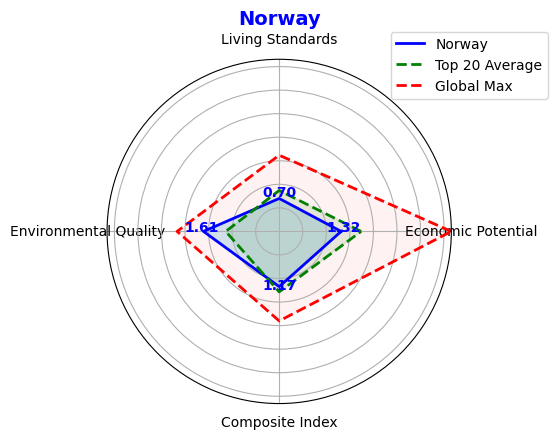

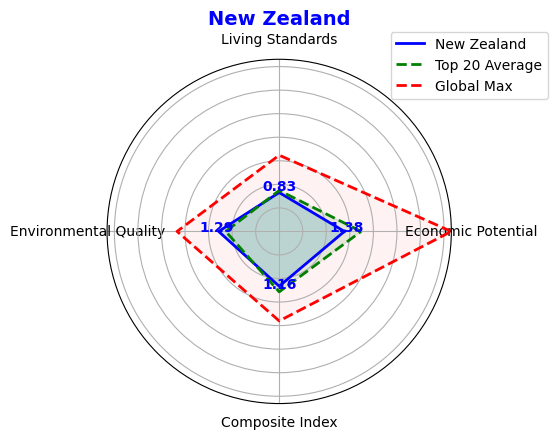

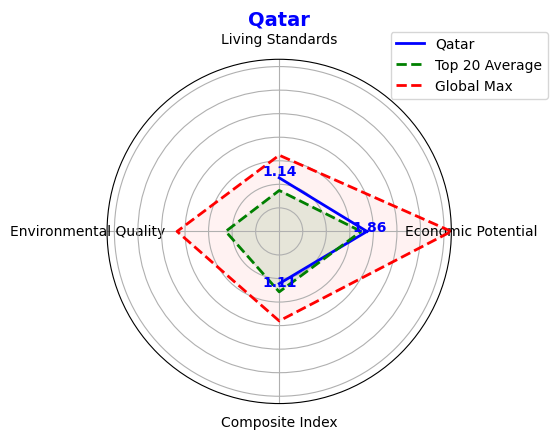

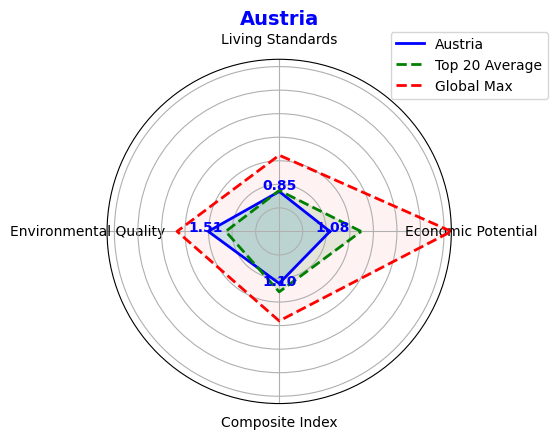

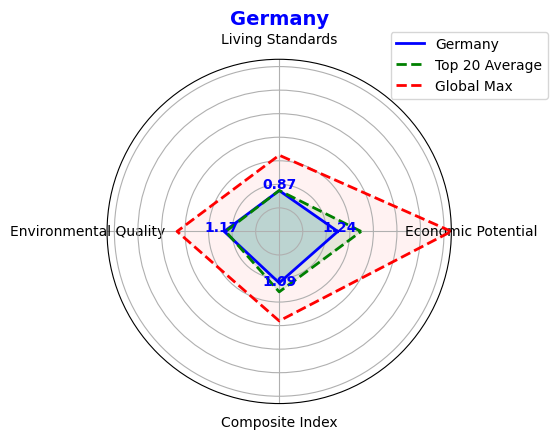

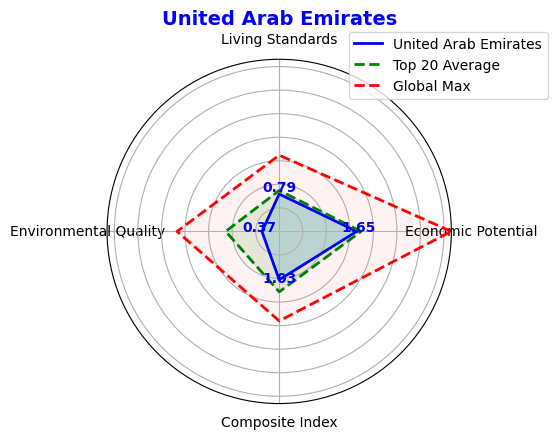

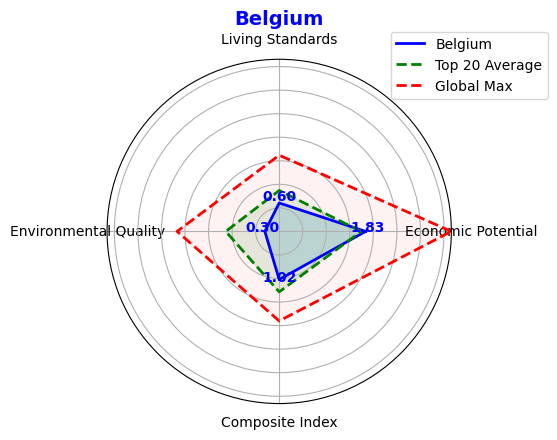

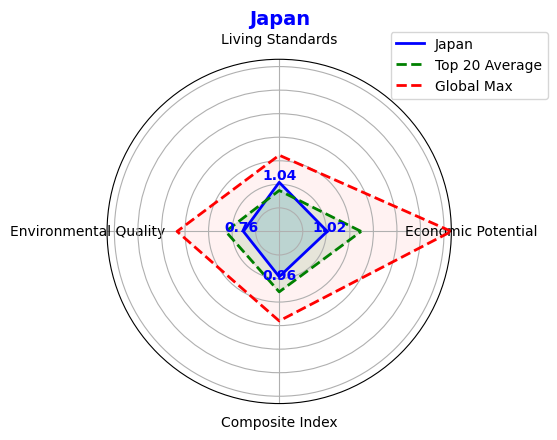

In [ ]:
# https://chatgpt.com/c/6814cd14-c698-8000-802d-88aef8171a1c
# https://chatgpt.com/c/6814fb7b-5138-8000-8cb4-878f15554cbc

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assume df contains full dataset and top_20_countries is a filtered version with top 20 by Composite_Index

# 1. Global maximums for each feature
global_max_values_per_feature = {
    'Economic Potential': df['Economic_Potential'].max(),
    'Living Standards': df['Living_Standards'].max(),
    'Environmental Quality': df['Environmental_Quality'].max(),
    'Composite Index': df['Composite_Index'].max()
}

# 2. Average values across the top 20 countries
average_values_top20 = {
    'Economic Potential': df[df['Country'].isin(top_20_countries['Country'])]['Economic_Potential'].mean(),
    'Living Standards': df[df['Country'].isin(top_20_countries['Country'])]['Living_Standards'].mean(),
    'Environmental Quality': df[df['Country'].isin(top_20_countries['Country'])]['Environmental_Quality'].mean(),
    'Composite Index': df[df['Country'].isin(top_20_countries['Country'])]['Composite_Index'].mean()
}

# 3. Use the overall global maximum value for consistent radar chart scaling
global_max_value = max(global_max_values_per_feature.values())

# 4. Function to plot radar chart
def plot_radar_chart(country, economic_potential, living_standards, environmental_quality, composite_index, global_max_value, avg_values=None, max_values=None):
    categories = ['Economic Potential', 'Living Standards', 'Environmental Quality', 'Composite Index']
    values = [economic_potential, living_standards, environmental_quality, composite_index]
    avg = [avg_values[cat] for cat in categories] if avg_values else None
    max_vals = [max_values[cat] for cat in categories] if max_values else None

    # Repeat first value to close the loop
    values += values[:1]
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]

    if avg:
        avg += avg[:1]
    if max_vals:
        max_vals += max_vals[:1]

    # Create radar chart
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color='skyblue', alpha=0.4)
    ax.plot(angles, values, color='blue', linewidth=2, label=country)

    if avg: ax.fill(angles, avg, color='green', alpha=0.1),ax.plot(angles, avg, color='green', linestyle='--', linewidth=2, label='Top 20 Average')
    if max_vals: ax.fill(angles, max_vals, color='red', alpha=0.05) ,ax.plot(angles, max_vals, color='red', linestyle='--', linewidth=2, label='Global Max')

    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_title(country, size=14, color='blue', weight='bold')
    ax.set_ylim(0, global_max_value)

    # Add value labels
    for i, value in enumerate(values[:-1]):
        angle = angles[i]
        ax.text(angle, value + 0.05, f'{value:.2f}', ha='center', size=10, color='blue', weight='bold')

    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.tight_layout()
    plt.show()

# 5. Loop and plot radar charts for top 20 countries
for index, row in top_20_countries.iterrows():
    country = row['Country']
    economic_potential = df.loc[df['Country'] == country, 'Economic_Potential'].values[0]
    living_standards = df.loc[df['Country'] == country, 'Living_Standards'].values[0]
    environmental_quality = df.loc[df['Country'] == country, 'Environmental_Quality'].values[0]
    composite_index = row['Composite_Index']

    plot_radar_chart(
        country,
        economic_potential,
        living_standards,
        environmental_quality,
        composite_index,
        global_max_value,
        avg_values=average_values_top20,
        max_values=global_max_values_per_feature
    )



In [4906]:
print(top_20_countries.columns.tolist())


['Country', 'Composite_Index']


C:\Users\wwwno\AppData\Local\Temp\ipykernel_1228\2112400123.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap(cmap)(range(50, 50 + len(top_10)))


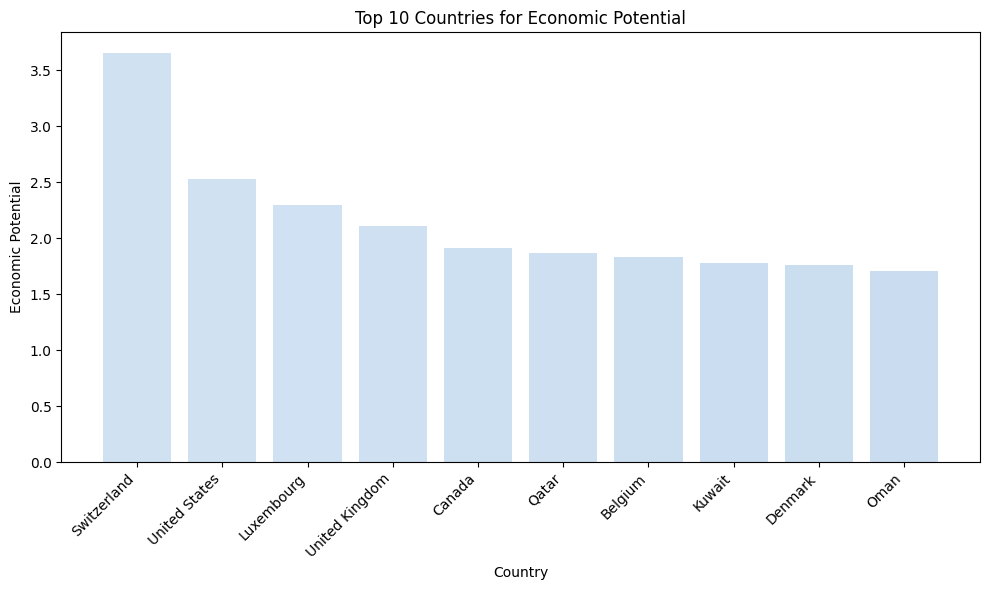

C:\Users\wwwno\AppData\Local\Temp\ipykernel_1228\2112400123.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap(cmap)(range(50, 50 + len(top_10)))


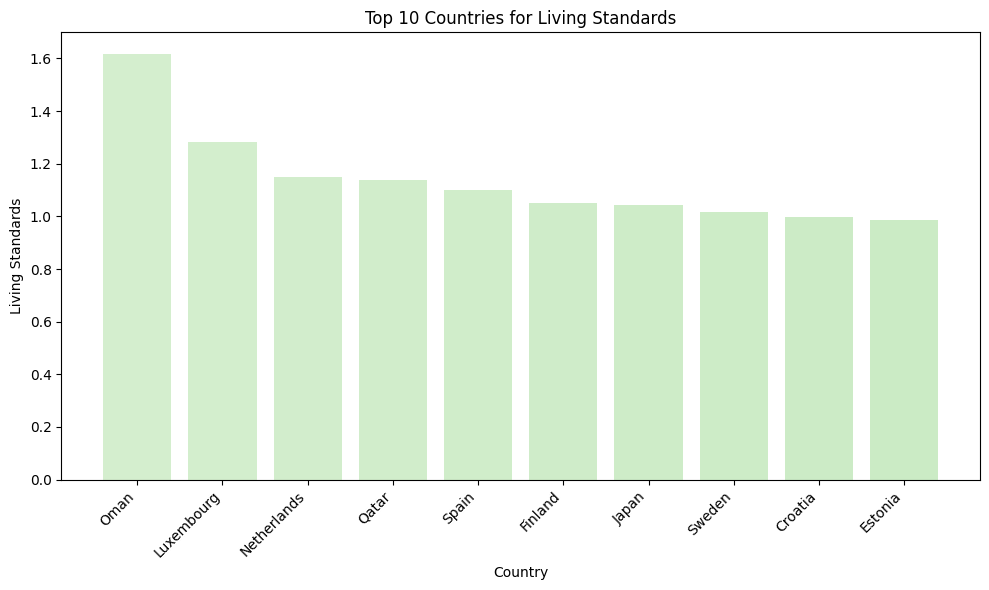

C:\Users\wwwno\AppData\Local\Temp\ipykernel_1228\2112400123.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap(cmap)(range(50, 50 + len(top_10)))


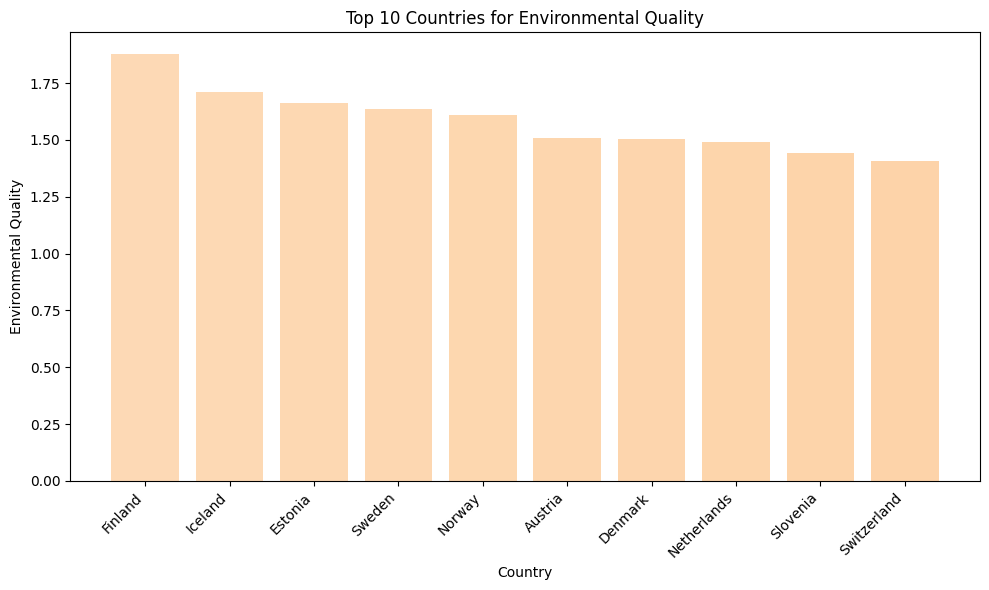

C:\Users\wwwno\AppData\Local\Temp\ipykernel_1228\2112400123.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap(cmap)(range(50, 50 + len(top_10)))


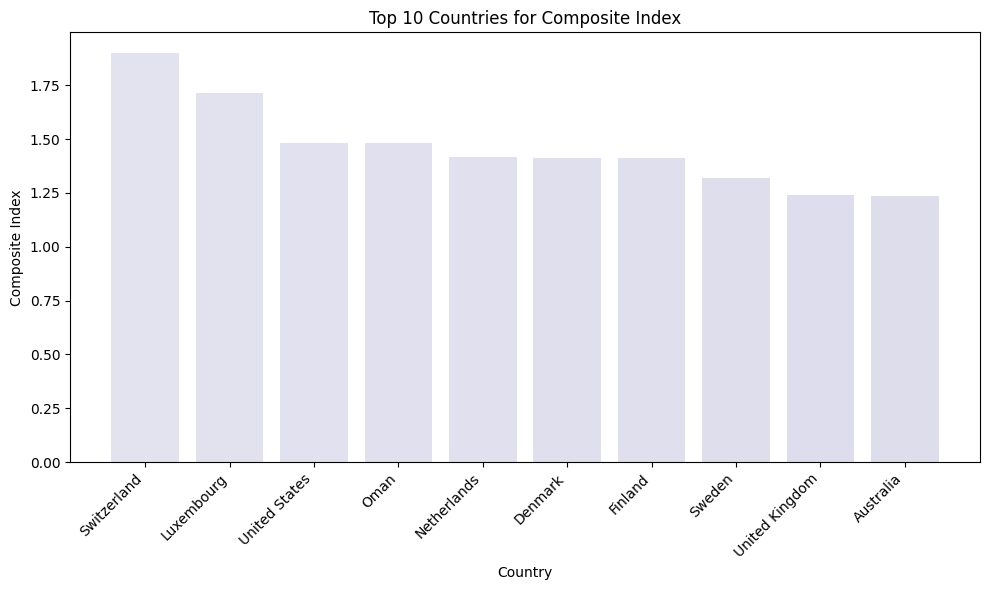

In [4907]:
# https://chatgpt.com/c/6814d584-b114-8000-b70c-dd541725691d

# List of sub-indexes and corresponding color maps
sub_indexes = {
    'Economic_Potential': 'Blues',
    'Living_Standards': 'Greens',
    'Environmental_Quality': 'Oranges',
    'Composite_Index': 'Purples'
}

# Loop through each sub-index and plot the top 10 countries
for sub_index, cmap in sub_indexes.items():
    # Filter countries with Quality of Life >= 116.56 and sub-index value > 0
    filtered_df = df[(df['Quality_of_Life_Value'] >= 116.56) & (df[sub_index] > 0)]
    top_10 = filtered_df.nlargest(10, sub_index)

    # Normalize color range
    colors = plt.cm.get_cmap(cmap)(range(50, 50 + len(top_10)))

    # Plot
    plt.figure(figsize=(10, 6))
    plt.bar(top_10['Country'], top_10[sub_index], color=colors)
    plt.xlabel('Country')
    plt.ylabel(sub_index.replace("_", " "))
    plt.title(f'Top 10 Countries for {sub_index.replace("_", " ").title()}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


C:\Users\wwwno\AppData\Local\Temp\ipykernel_1228\4194390621.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap(cmap)(np.linspace(0.4, 0.9, len(top_10)))


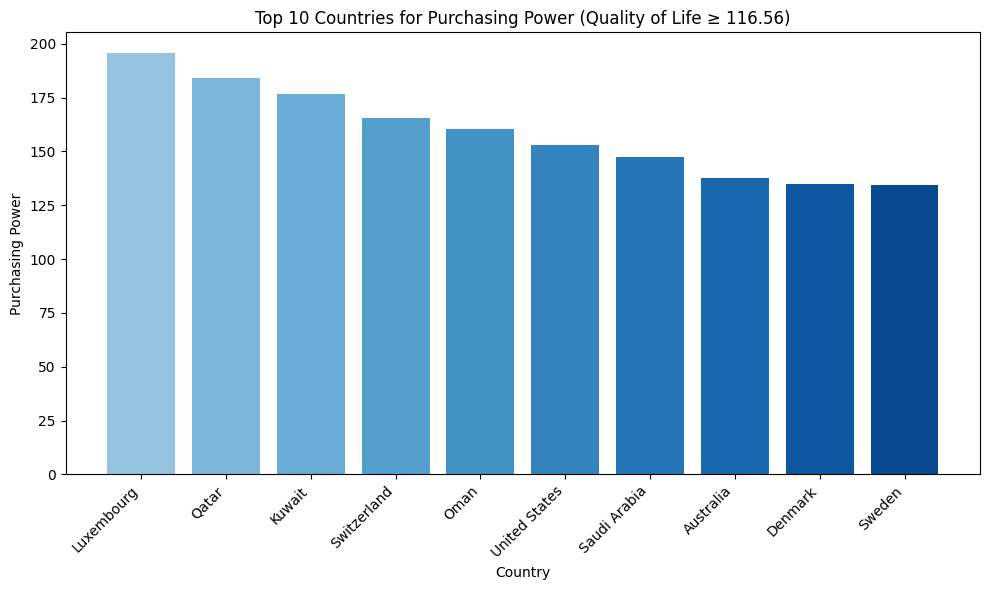

C:\Users\wwwno\AppData\Local\Temp\ipykernel_1228\4194390621.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap(cmap)(np.linspace(0.4, 0.9, len(top_10)))


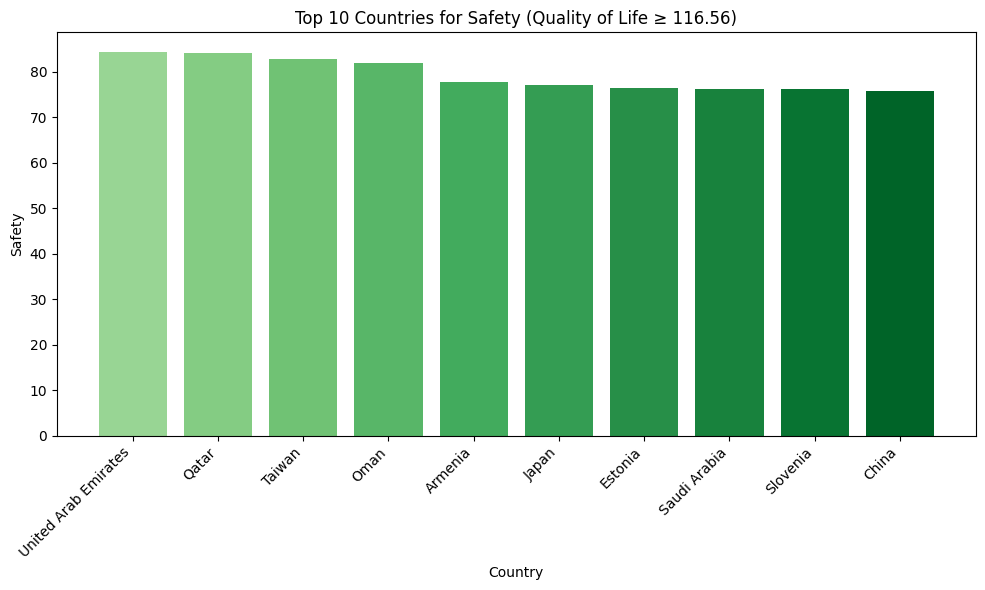

C:\Users\wwwno\AppData\Local\Temp\ipykernel_1228\4194390621.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap(cmap)(np.linspace(0.4, 0.9, len(top_10)))


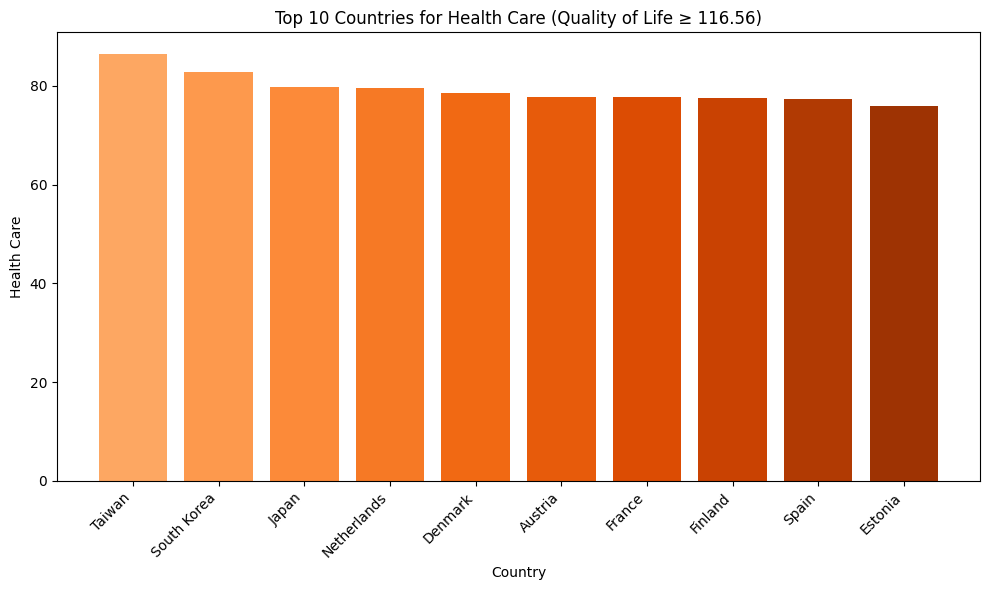

C:\Users\wwwno\AppData\Local\Temp\ipykernel_1228\4194390621.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap(cmap)(np.linspace(0.4, 0.9, len(top_10)))


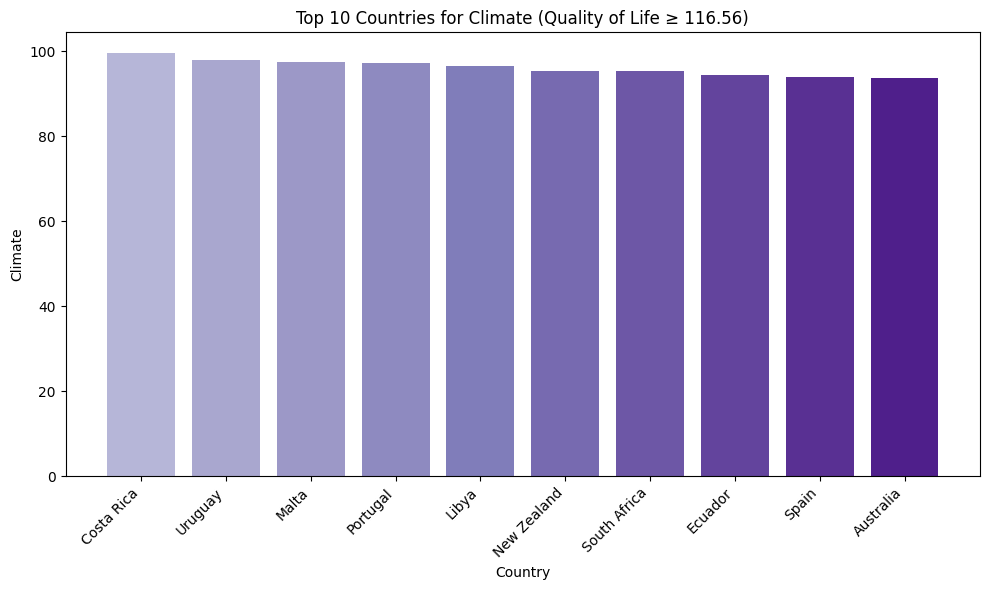

C:\Users\wwwno\AppData\Local\Temp\ipykernel_1228\4194390621.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap(cmap)(np.linspace(0.4, 0.9, len(top_10)))


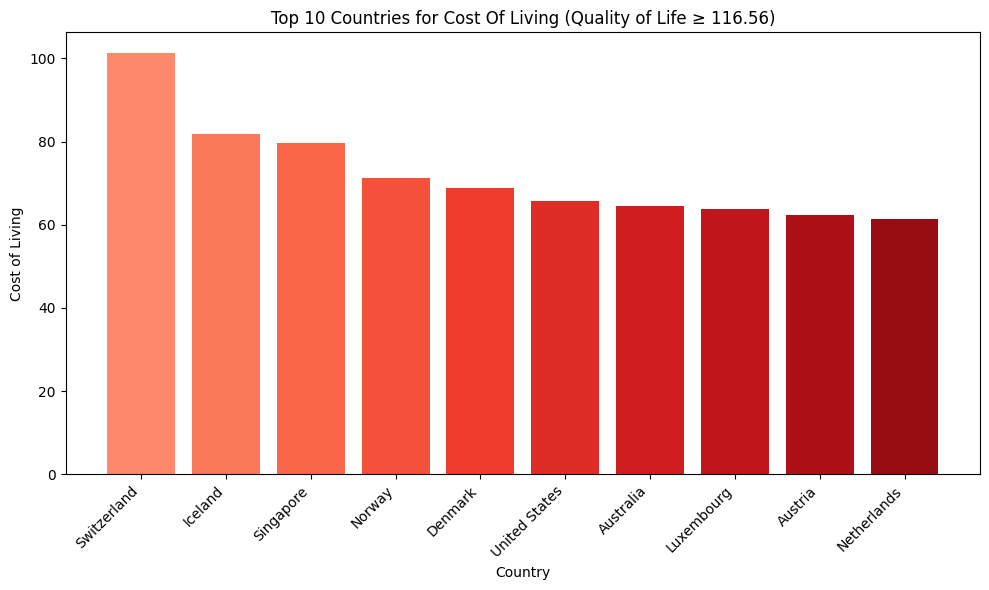

C:\Users\wwwno\AppData\Local\Temp\ipykernel_1228\4194390621.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap(cmap)(np.linspace(0.4, 0.9, len(top_10)))


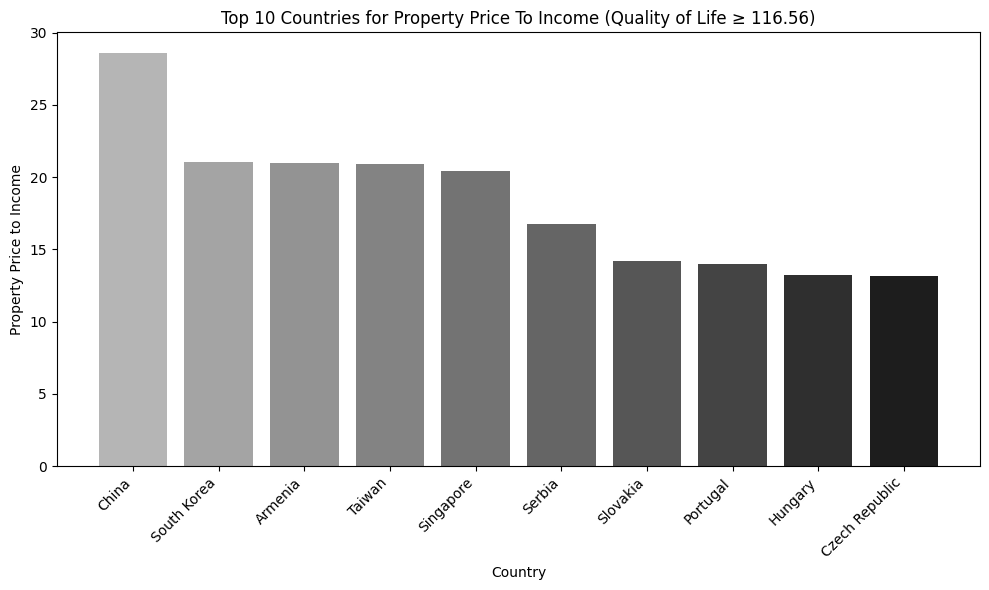

C:\Users\wwwno\AppData\Local\Temp\ipykernel_1228\4194390621.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap(cmap)(np.linspace(0.4, 0.9, len(top_10)))


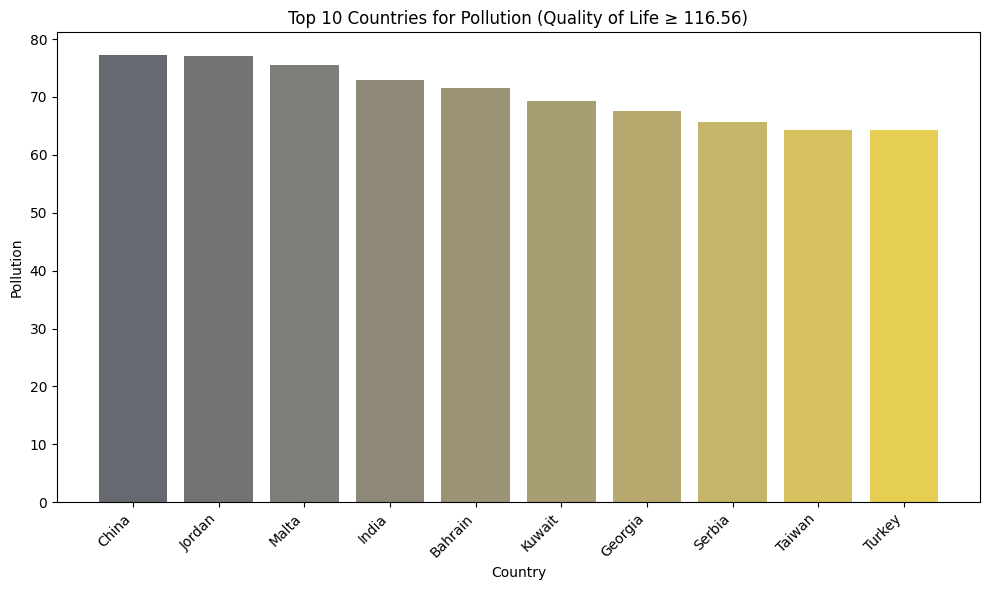

C:\Users\wwwno\AppData\Local\Temp\ipykernel_1228\4194390621.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap(cmap)(np.linspace(0.4, 0.9, len(top_10)))


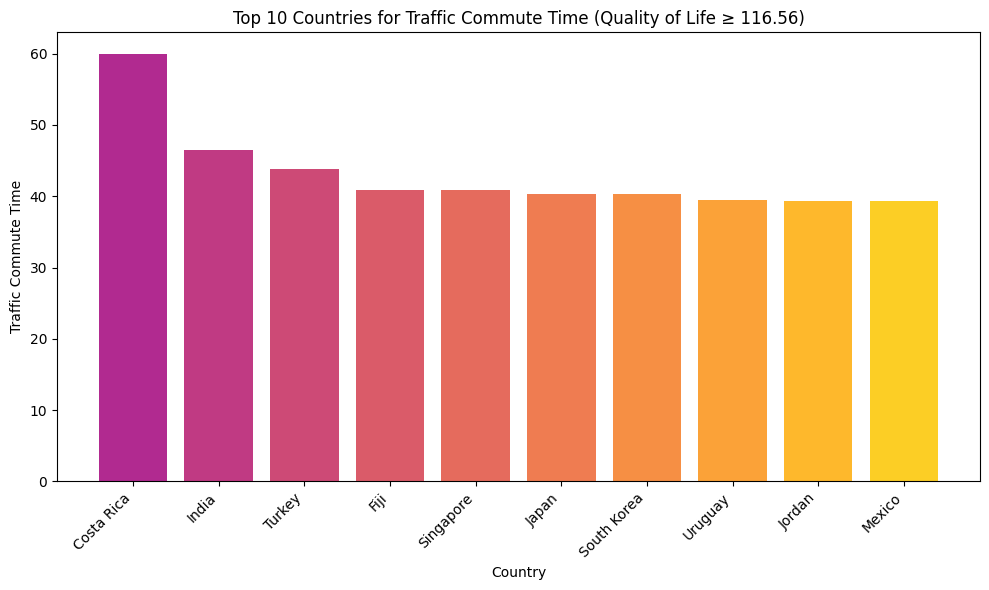

In [ ]:
# https://chatgpt.com/c/6817ae0d-b8bc-8000-907c-a8a52441104d

# Dictionary of other features with color maps
other_features_cmap = {
    'Purchasing_Power_Value': 'Blues',
    'Safety_Value': 'Greens',
    'Health_Care_Value': 'Oranges',
    'Climate_Value': 'Purples',
    'Cost_of_Living_Value': 'Reds',
    'Property_Price_to_Income_Value': 'Greys',
    'Pollution_Value': 'cividis',
    'Traffic_Commute_Time_Value': 'plasma'
}

# Loop through each feature and plot the top 10 countries
for feature, cmap in other_features_cmap.items():
    # Apply filtering: Quality_of_Life_Value >= 116.56 and feature value > 0
    filtered_df = df[(df['Quality_of_Life_Value'] >= 116.56) & (df[feature] > 0)]

    # Get top 10 countries for this feature
    top_10 = filtered_df.nlargest(10, feature)

    # Generate color gradient
    colors = plt.cm.get_cmap(cmap)(np.linspace(0.4, 0.9, len(top_10)))

    # Plot
    plt.figure(figsize=(10, 6))
    plt.bar(top_10['Country'], top_10[feature], color=colors)
    plt.xlabel('Country')
    plt.ylabel(feature.replace("_Value", "").replace("_", " "))
    plt.title(f'Top 10 Countries for {feature.replace("_Value", "").replace("_", " ").title()} (Quality of Life ≥ 116.56)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
